# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [1]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

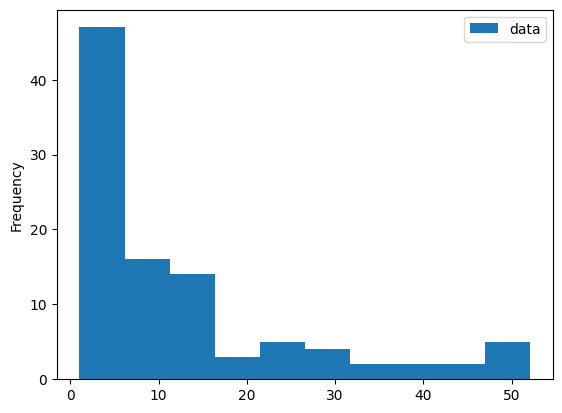

In [2]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

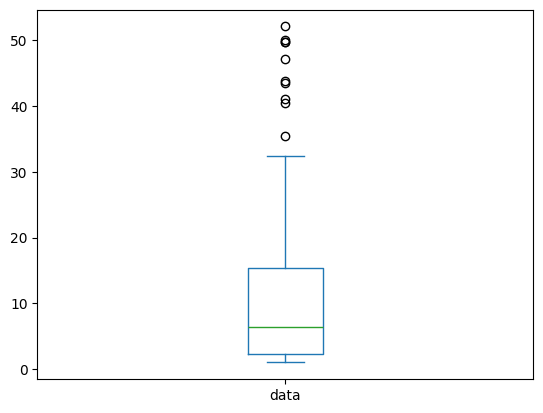

In [3]:
df.plot.box()

| Plot Type     | Pros                                                                 | Cons                                                                    |
|---------------|----------------------------------------------------------------------|-------------------------------------------------------------------------|
| **Histogram** | Clearly shows the distribution shape, skewness, and modes                | Does not show key summary stats (such as median) explicitly                 |
| **Boxplot**   | Shows the median, IQR, and outliers very clearly                    | Does not show distribution shape or frequency of values                 |

In this case, the pharmacy administrator wants to understand how expensive drugs compare to the typical prices, so both summary and distribution are important. I would use both plots side by side to paint a full picture of the data. The histogram displays the full spread and skewness, while the boxplot identifies unusually expensive drugs. To improve clarity and visual appeal of the graphs I would do the following:
* Set an appropriate size for the bins. This avoids overcrowding and better displays the distribution.
* Add axis labels and titles to the graphs so that the viewers understand what the axes mean.
* Provide a reference line of important stats, such as the mean of the data.
* Use tight_layout() to prevent labels from being cut off.

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

In [4]:
#imports 
import matplotlib.pyplot as plt
import seaborn as sns

#set seaborn style
sns.set(style="whitegrid")

##### **Marketing Campaign Dataset**

In [5]:
#Dataset 1: Marketing Campaign Dataset
marketing_campaign = pd.read_csv("marketing_campaign.csv", sep=';')
nullrows = marketing_campaign[marketing_campaign.isnull().any(axis=1)] #check for null rows
marketing_campaign.dropna(inplace=True) #drop null rows
marketing_campaign.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

##### Analysis:
##### Histograms:

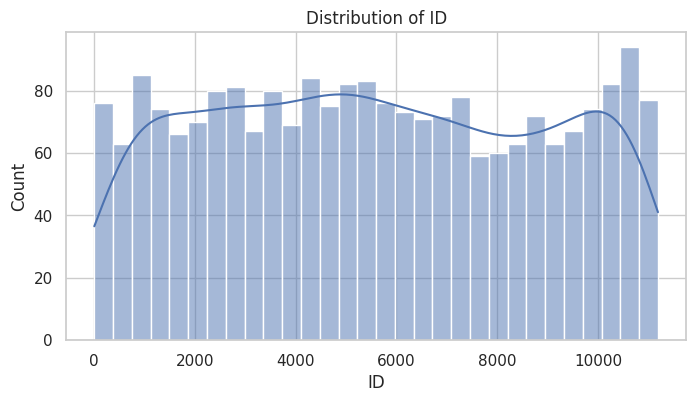

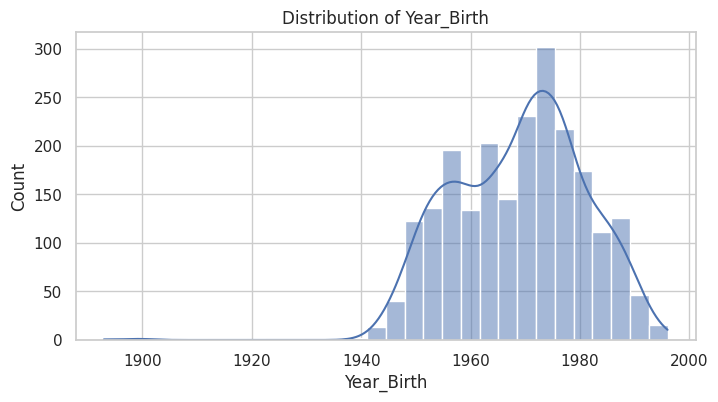

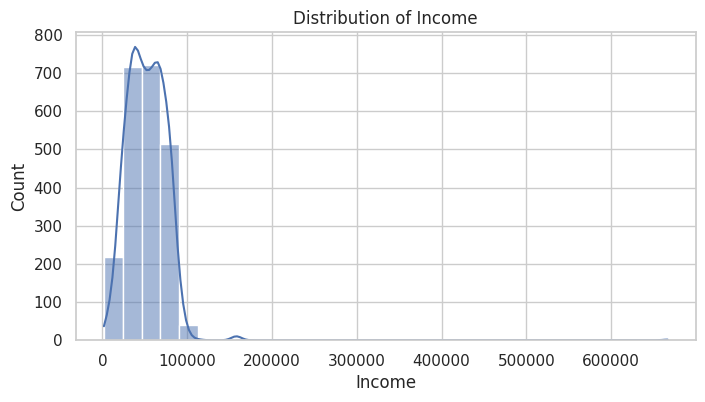

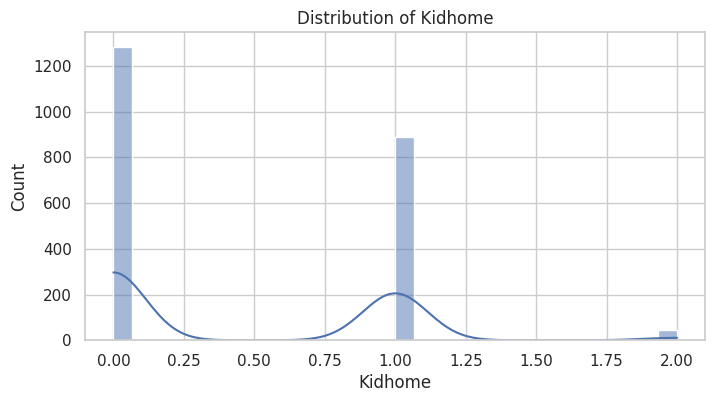

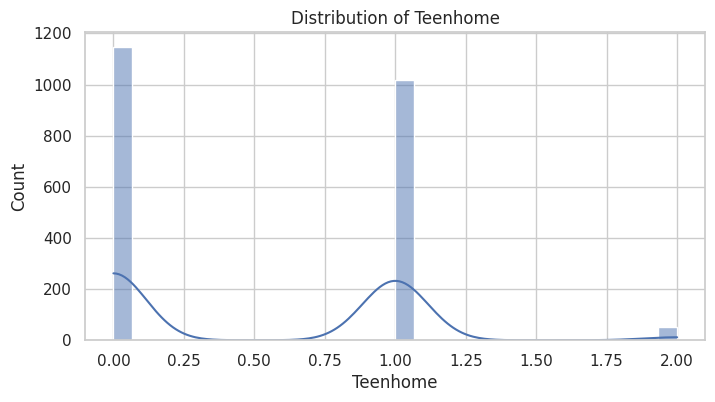

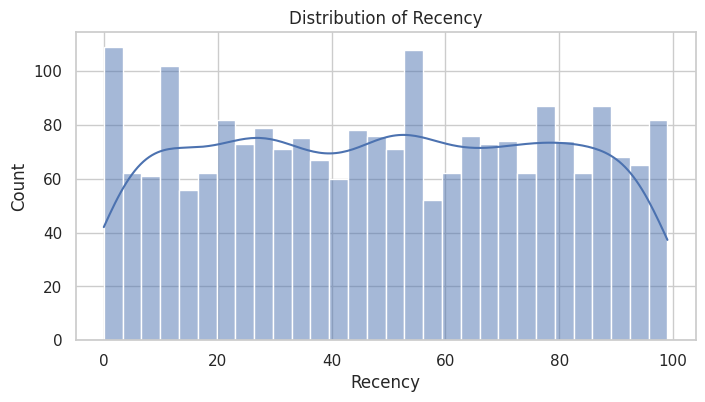

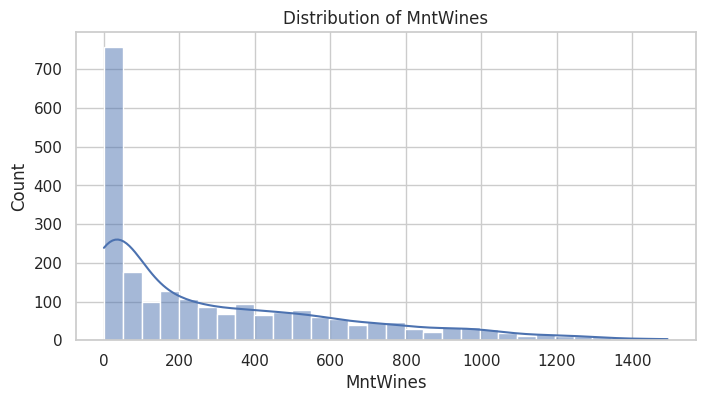

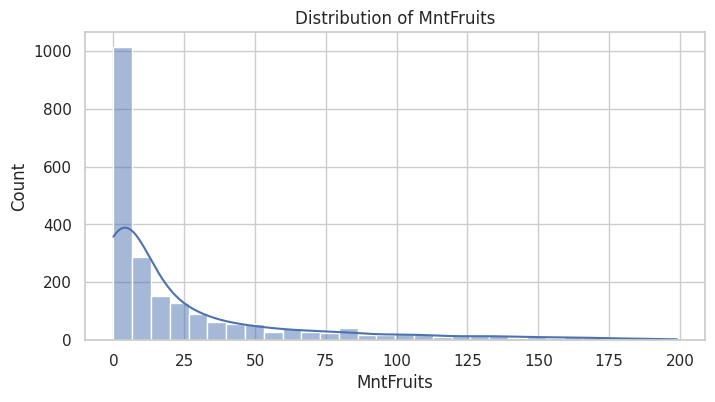

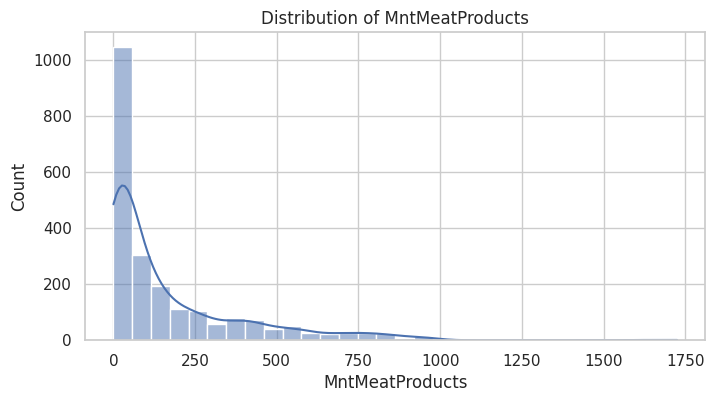

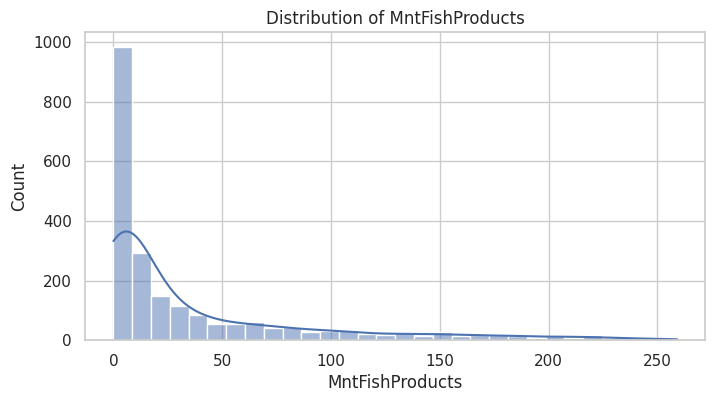

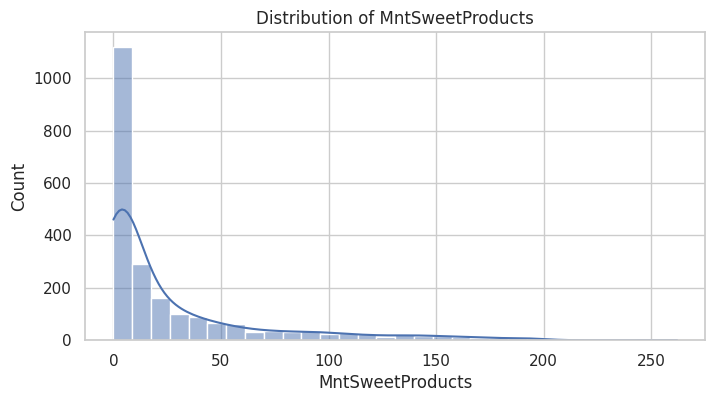

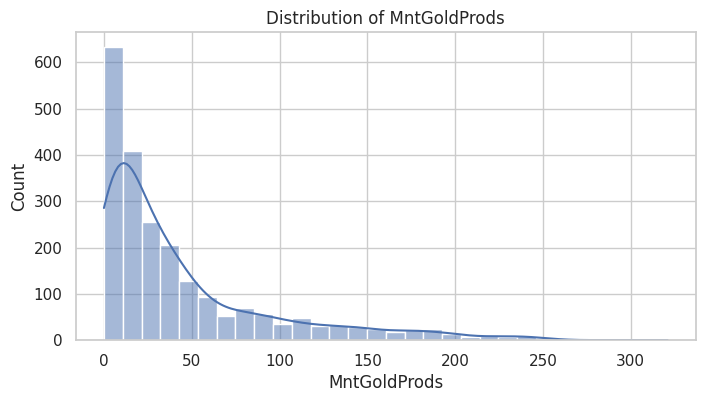

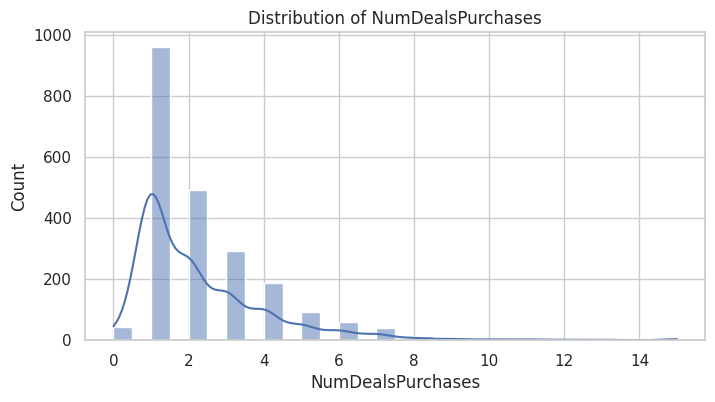

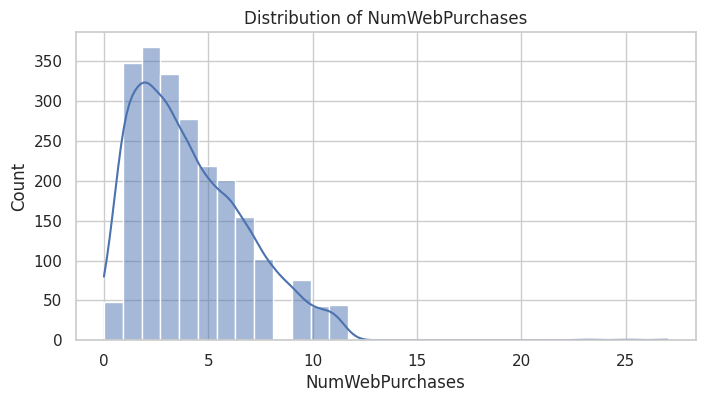

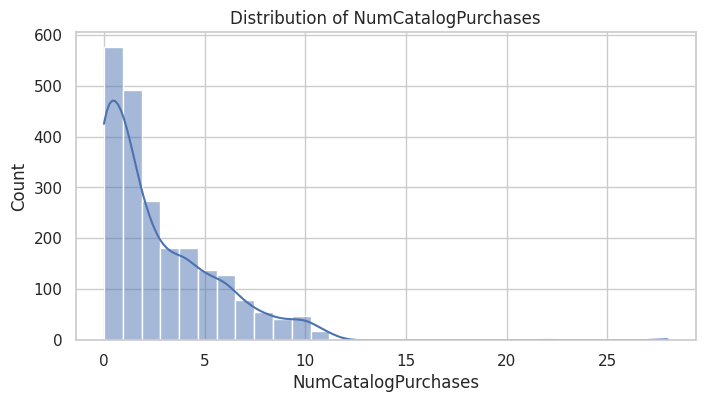

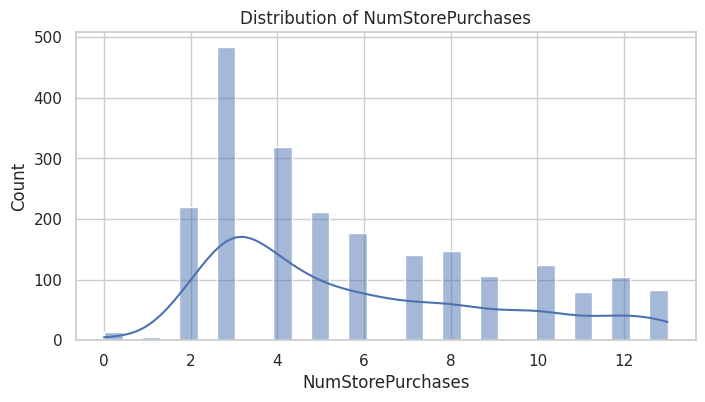

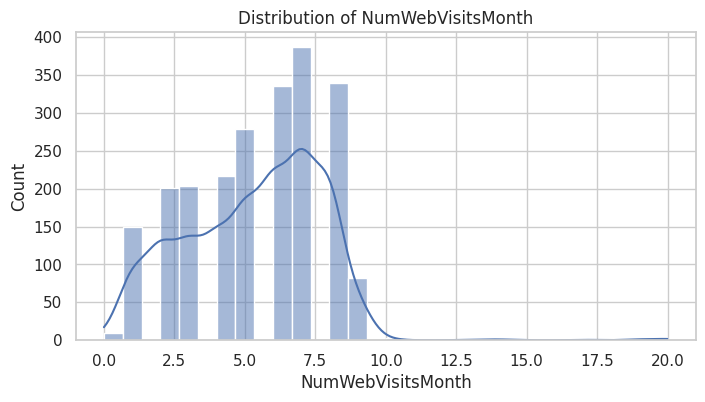

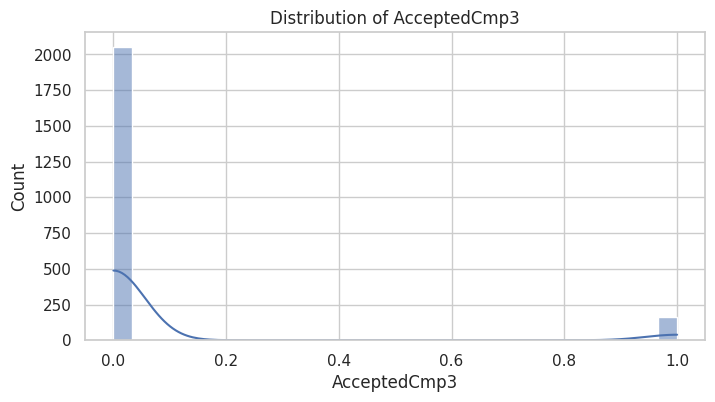

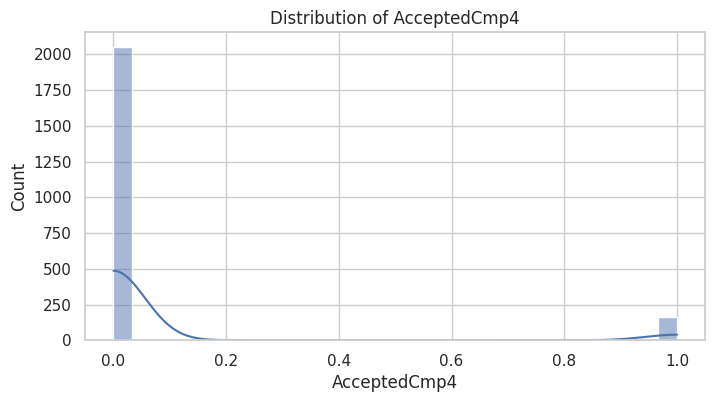

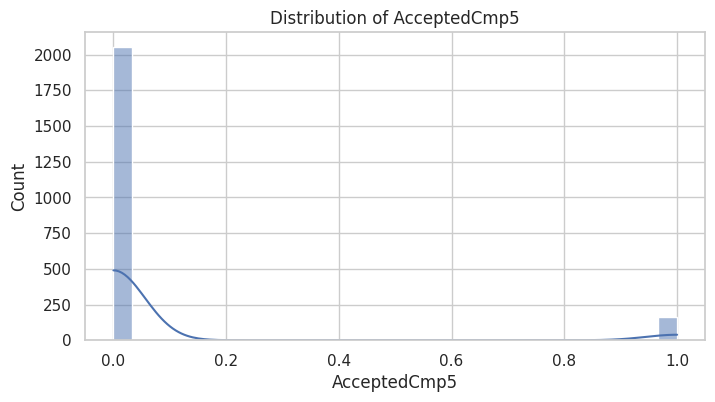

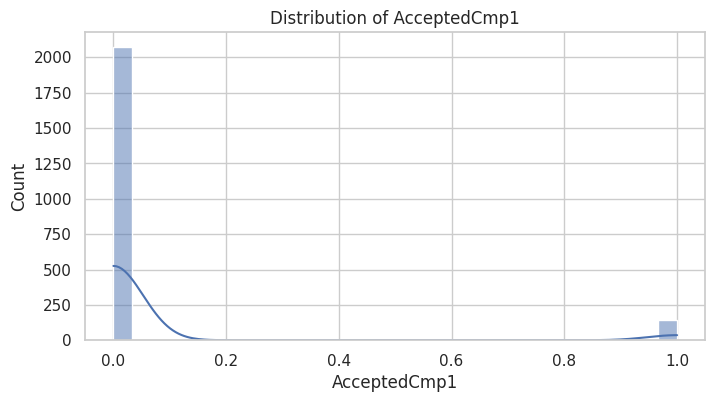

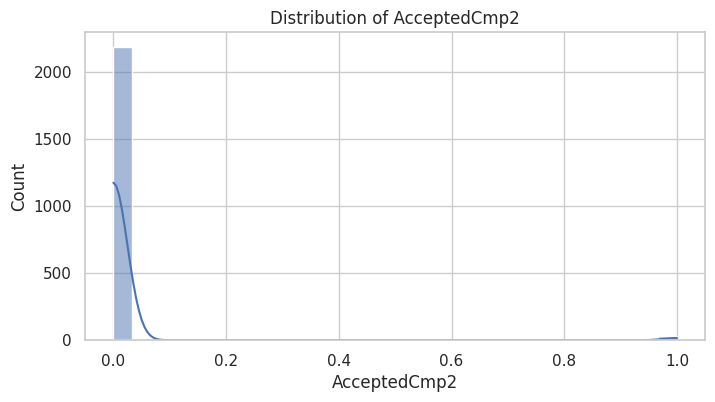

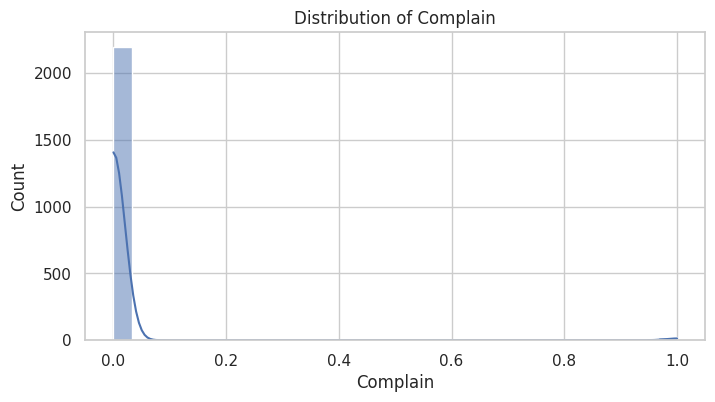

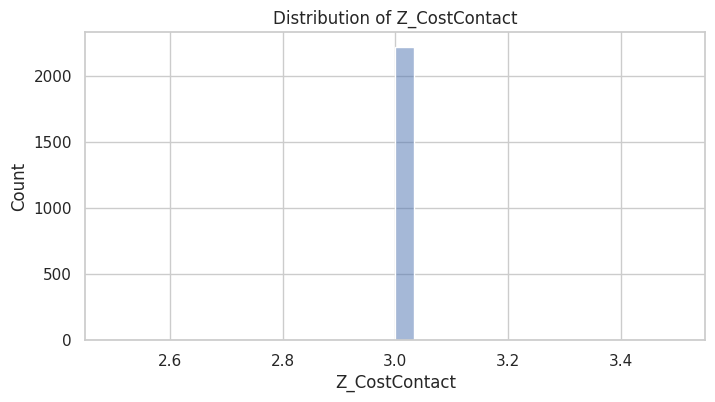

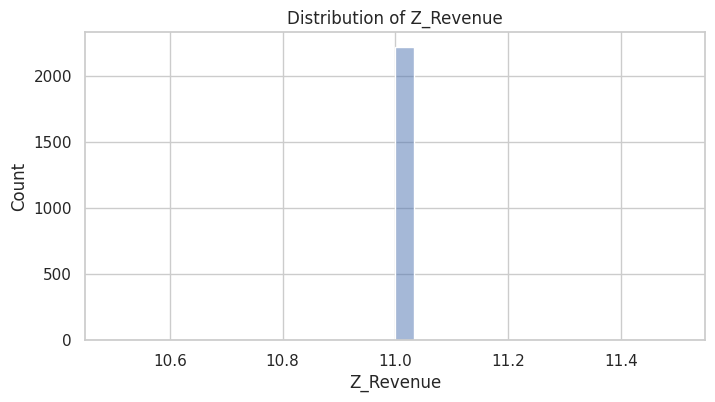

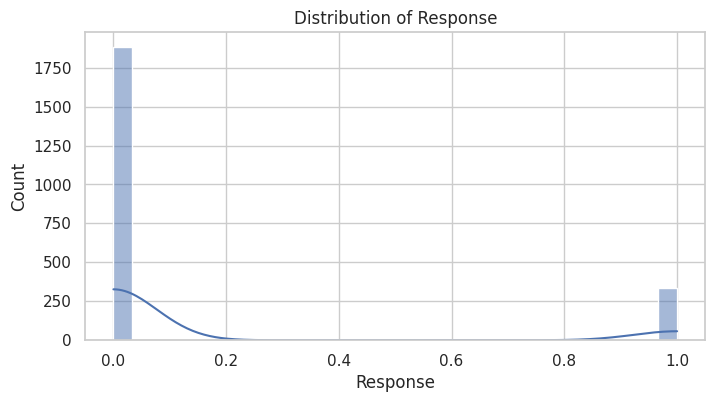

In [6]:
#select only numeric cols:
mc_num = marketing_campaign.select_dtypes(include='number')
#create histograms
for col in mc_num:
    plt.figure(figsize=(8, 4))
    sns.histplot(mc_num[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

no variance in Z_CostContact and Z_Revenue; dropping columsn for clearer analysis:

In [7]:
mc_num = mc_num.drop(columns=['Z_CostContact', 'Z_Revenue'])
mc_num.columns

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

##### KDE (Kernel Density Estimation) Plots:

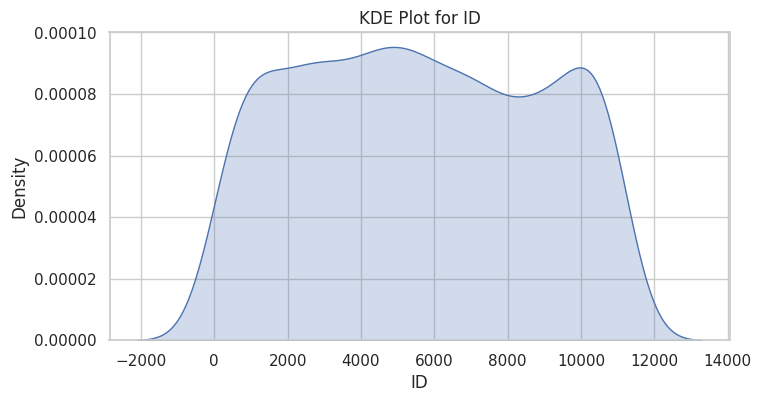

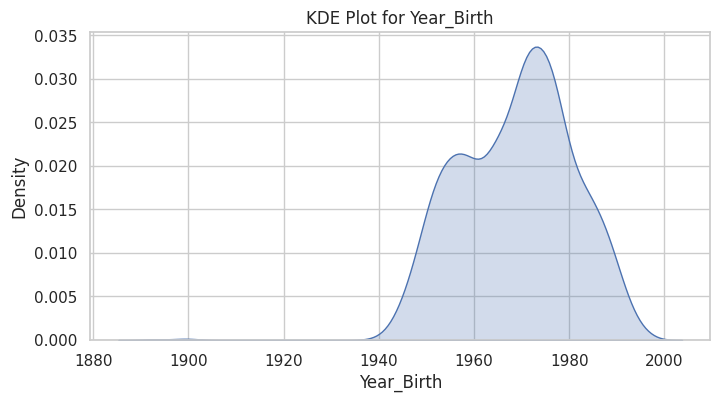

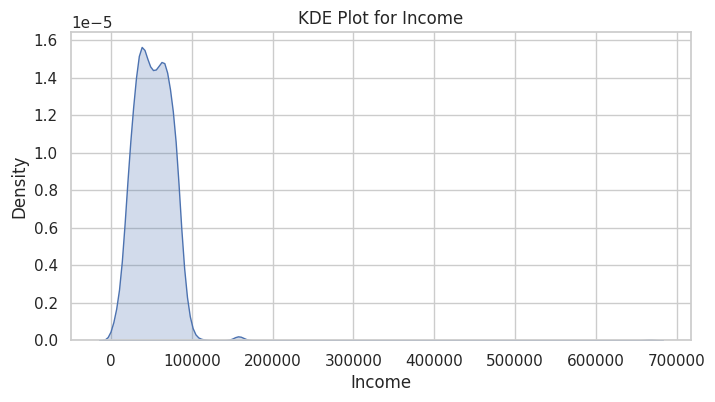

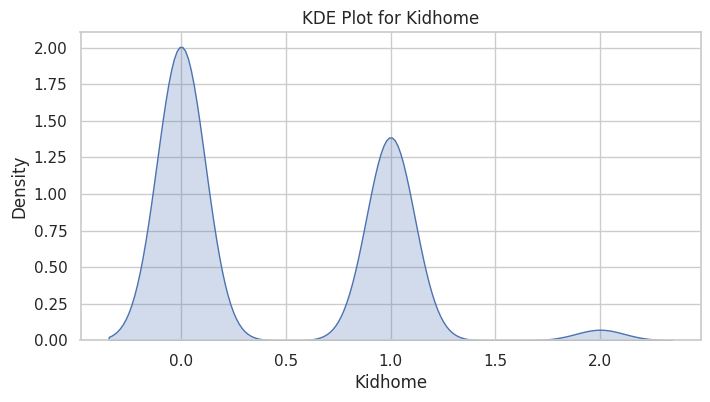

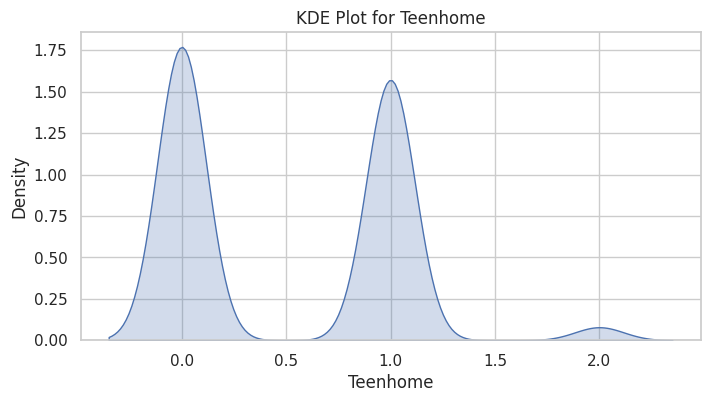

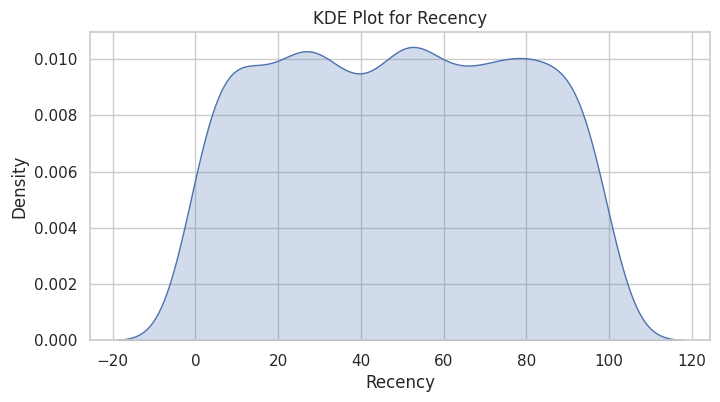

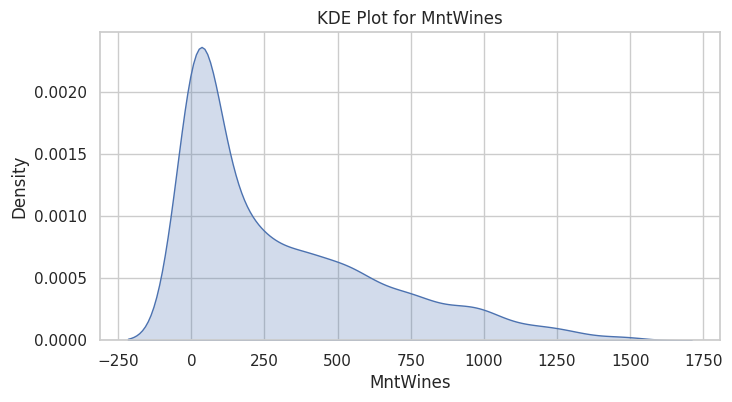

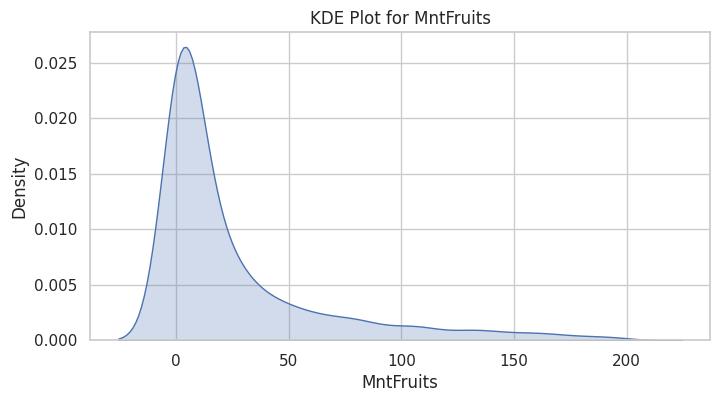

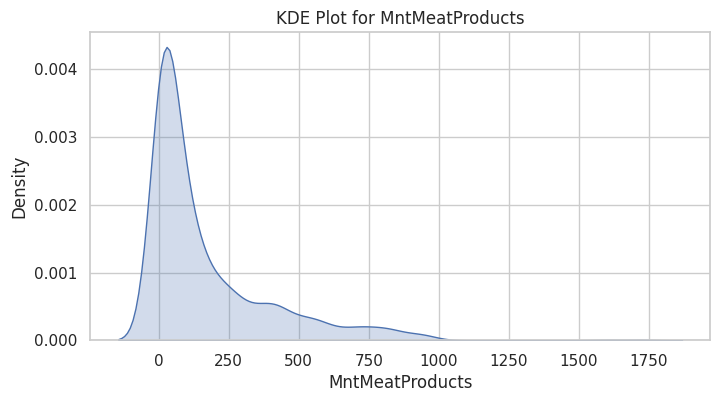

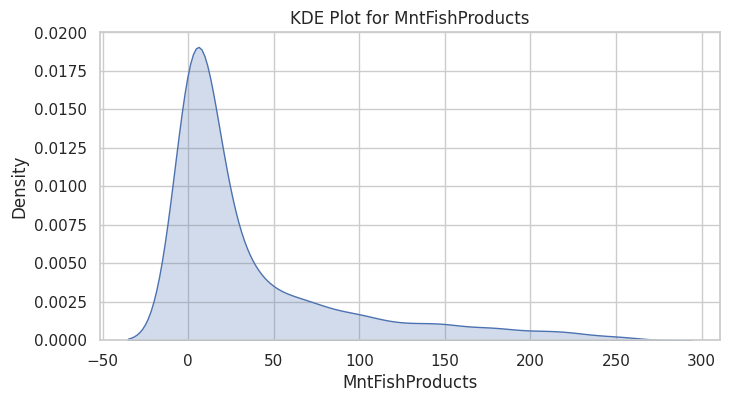

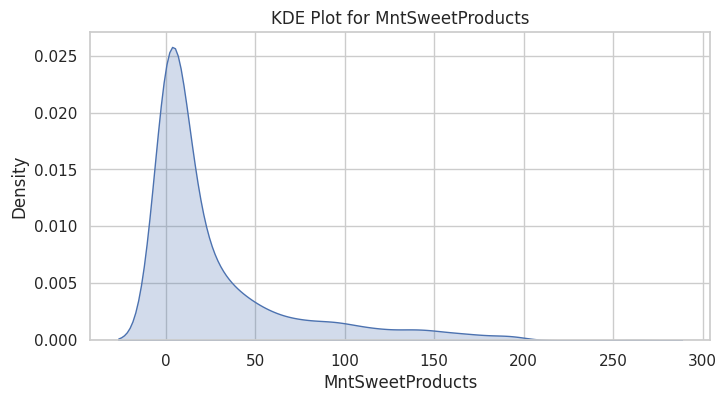

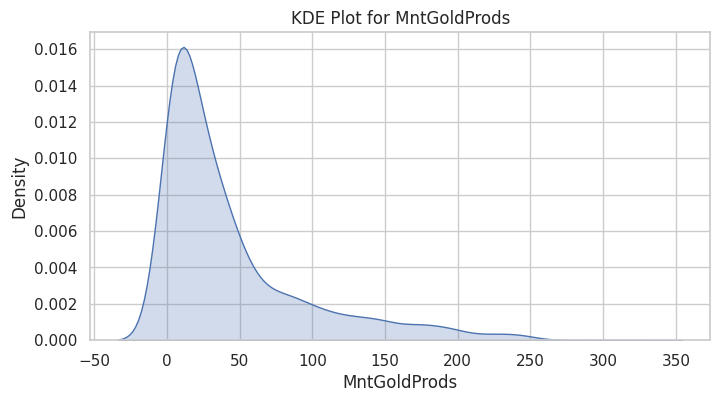

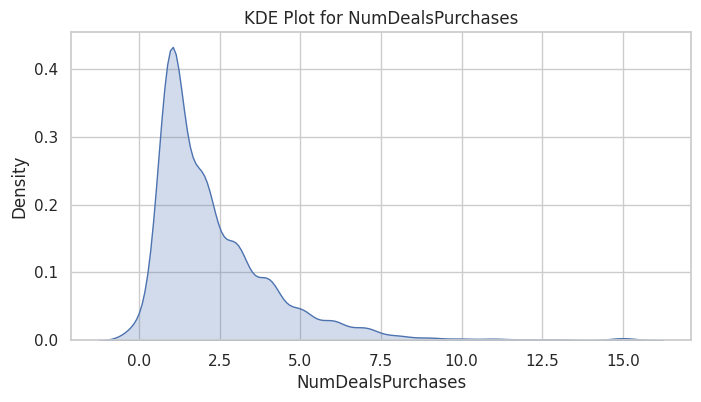

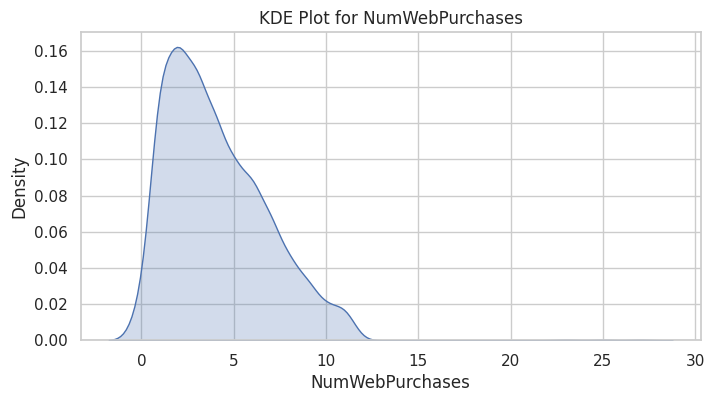

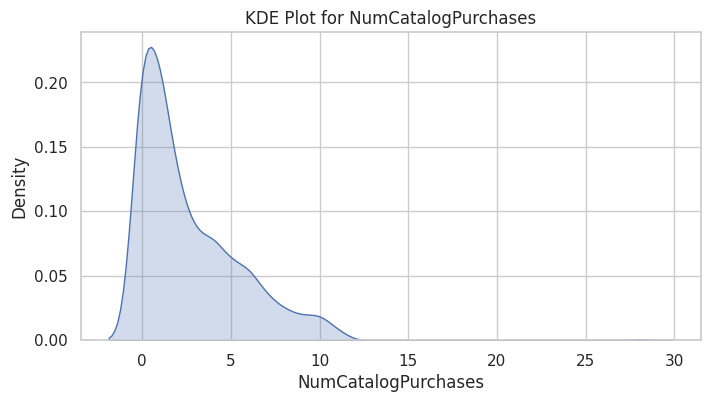

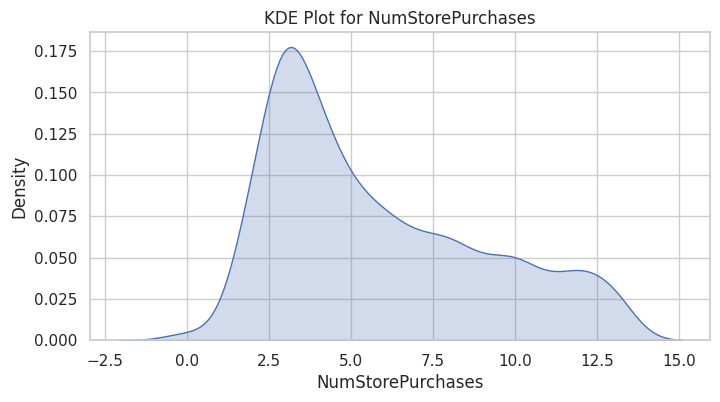

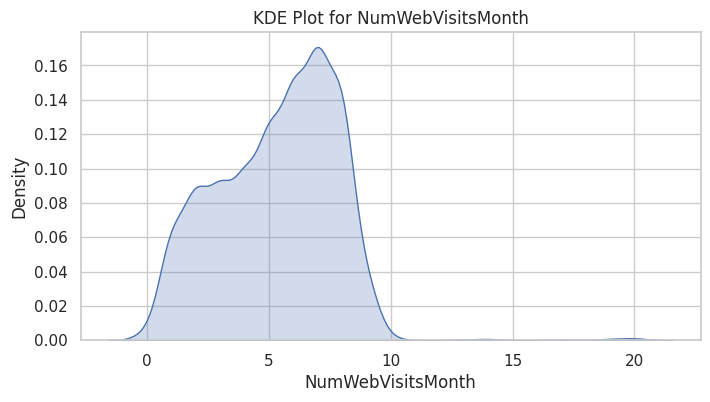

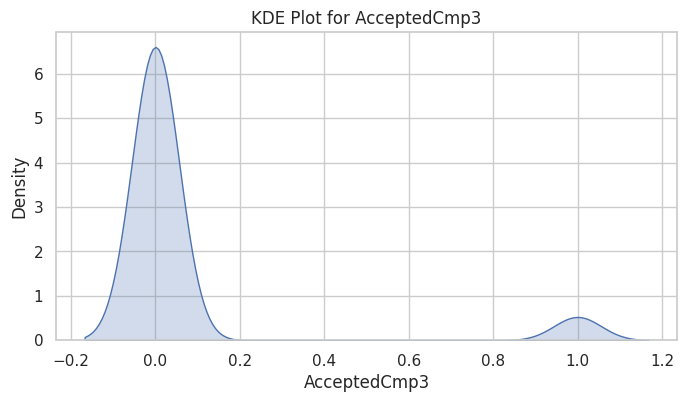

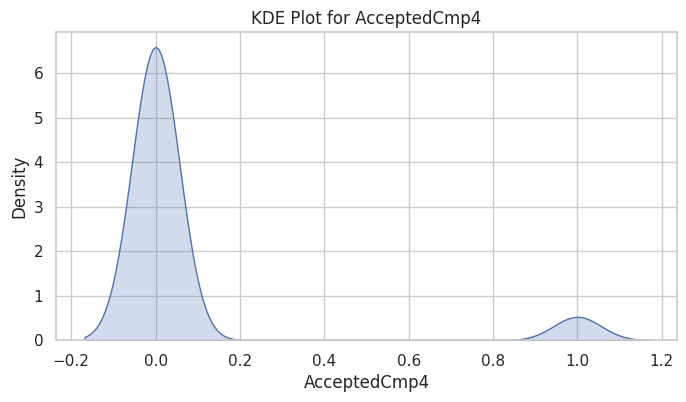

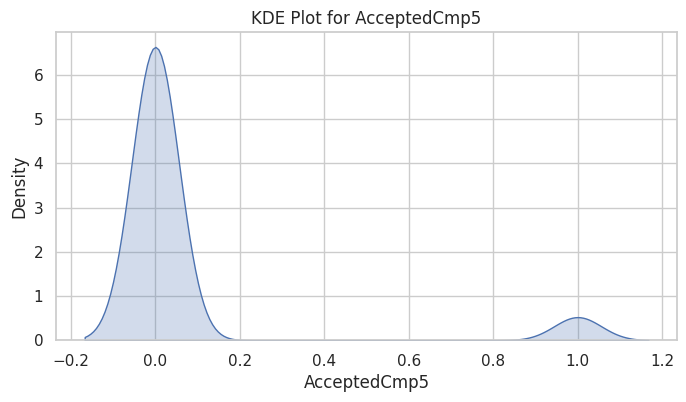

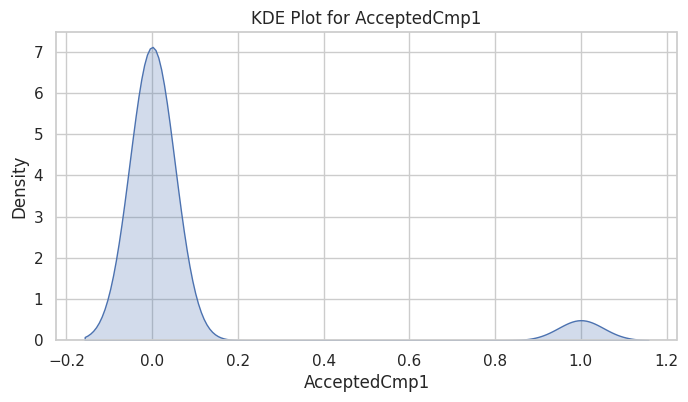

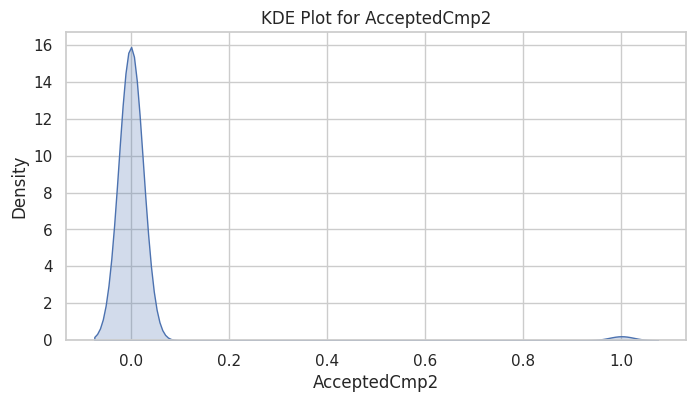

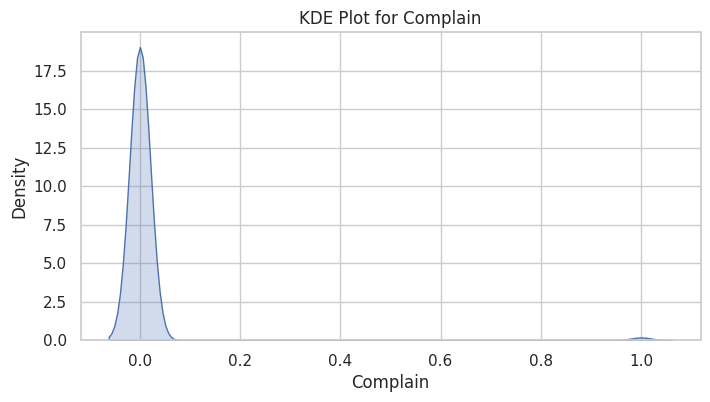

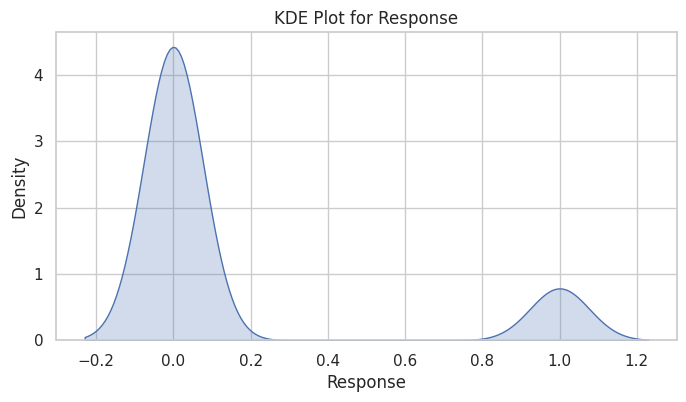

In [8]:
#create KDE plot (Kernel Density Estimation)
for col in mc_num:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(mc_num[col], fill=True)
    plt.title(f'KDE Plot for {col}')
    plt.show()

##### Violin Plots:

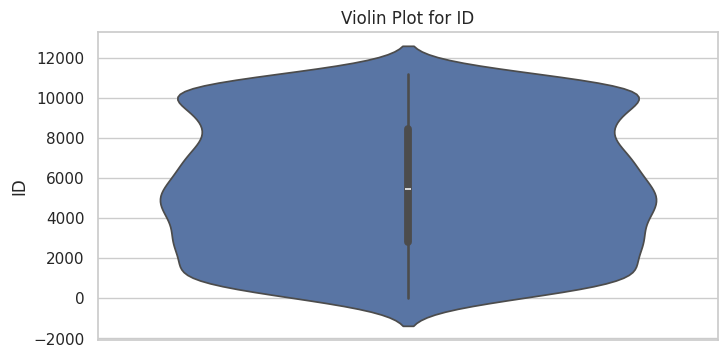

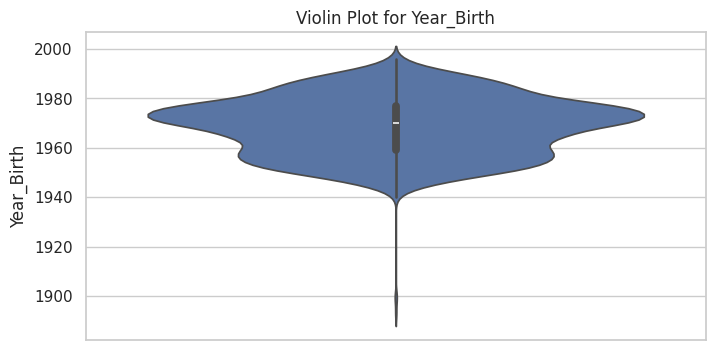

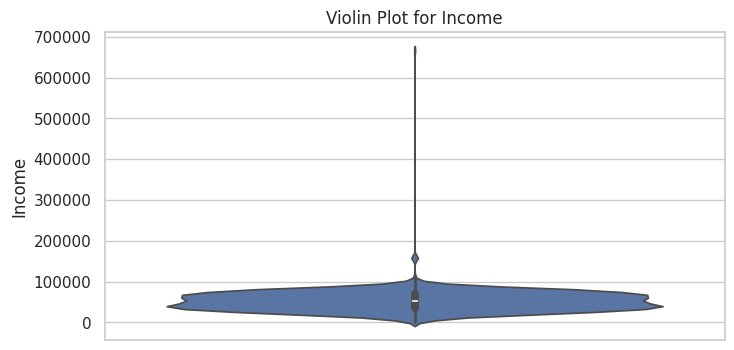

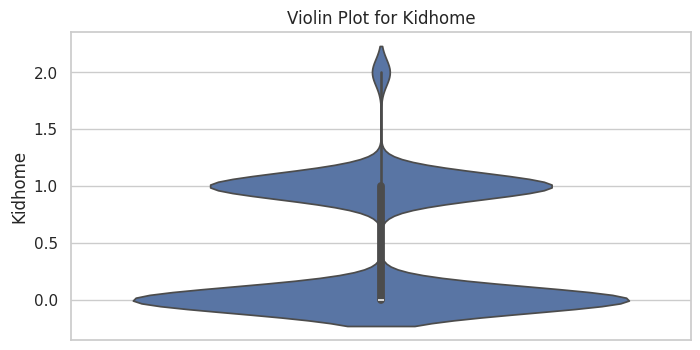

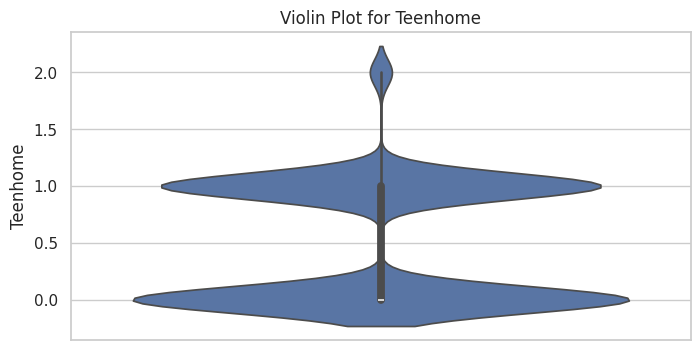

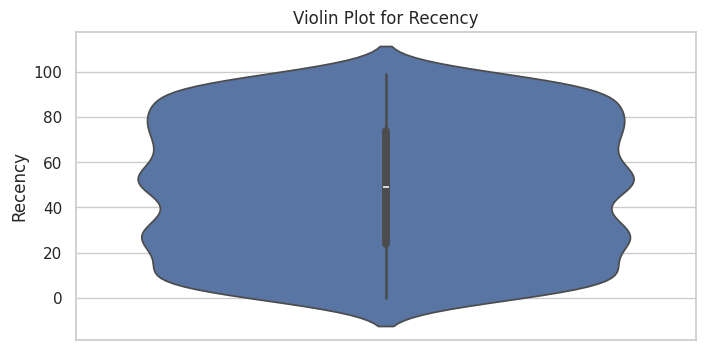

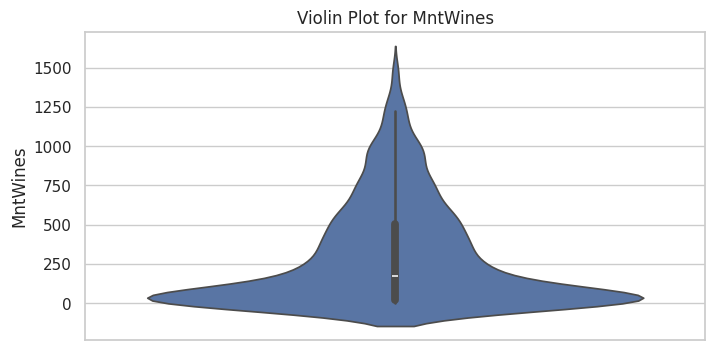

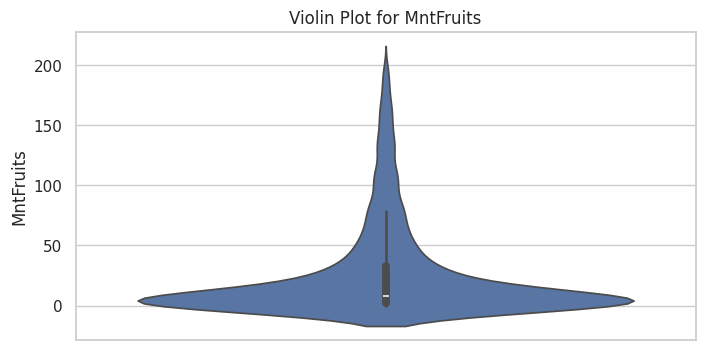

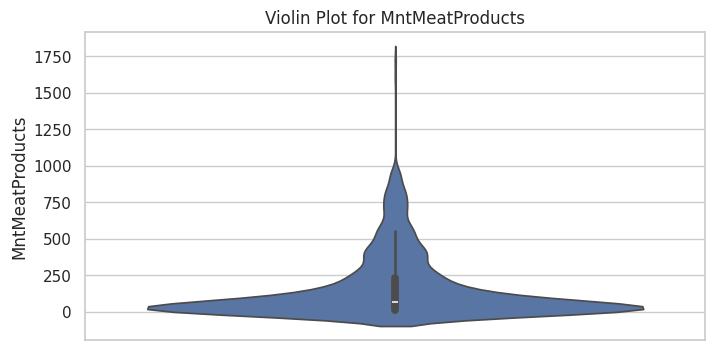

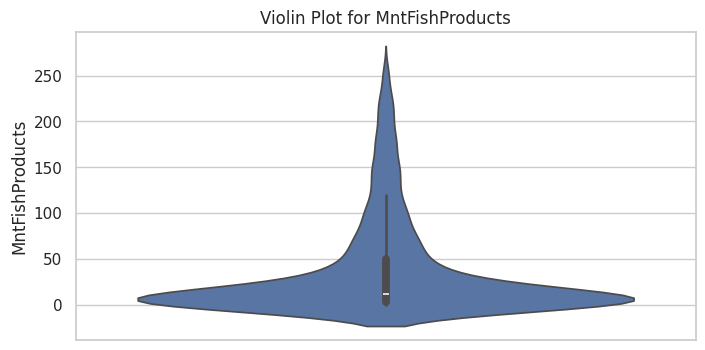

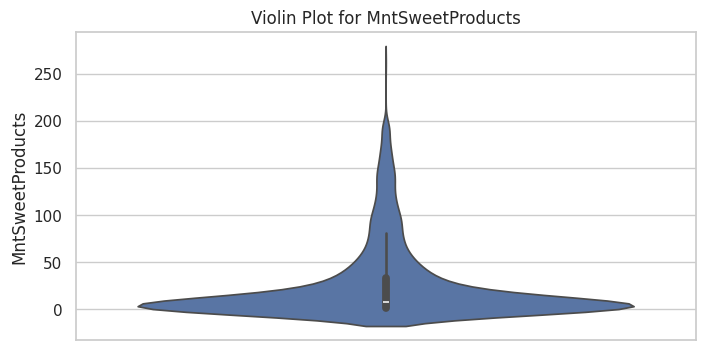

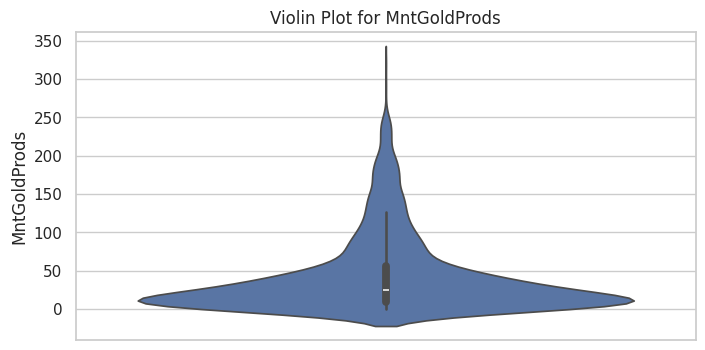

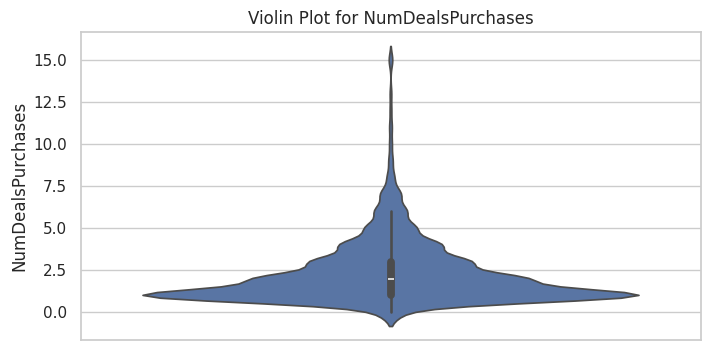

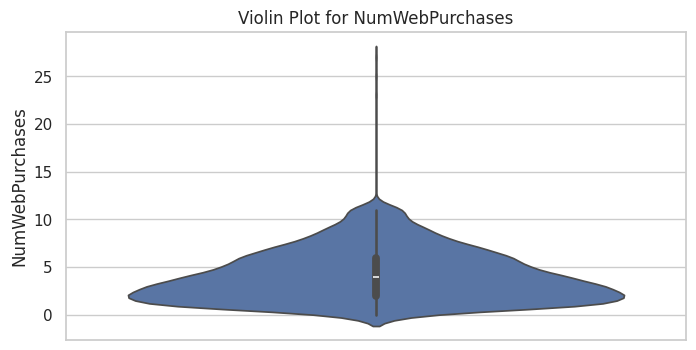

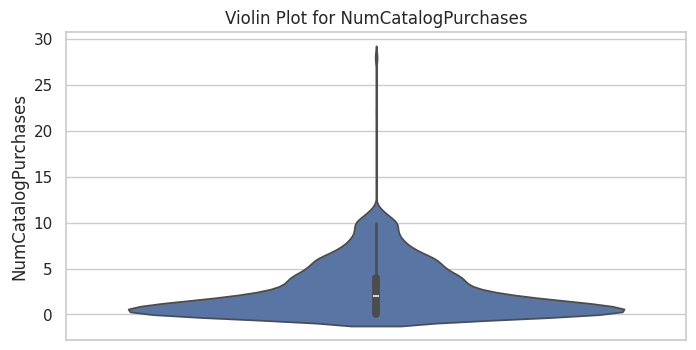

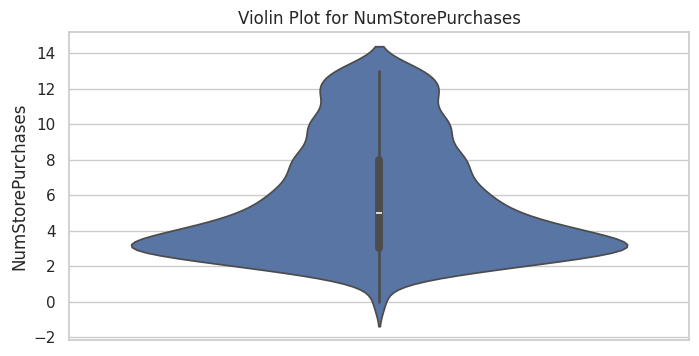

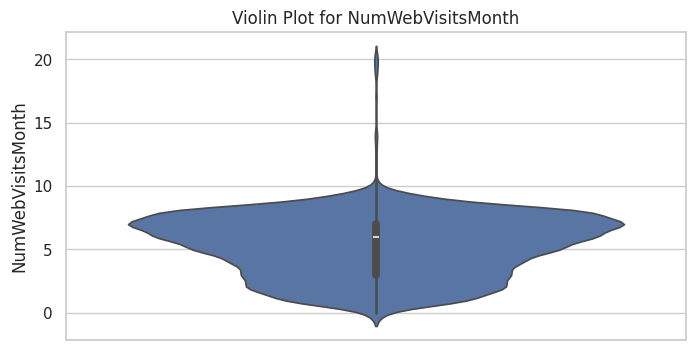

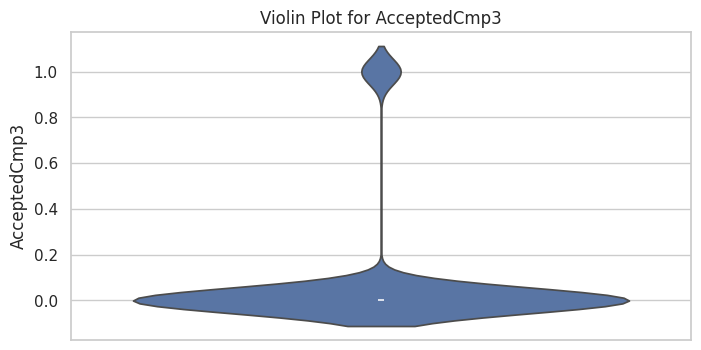

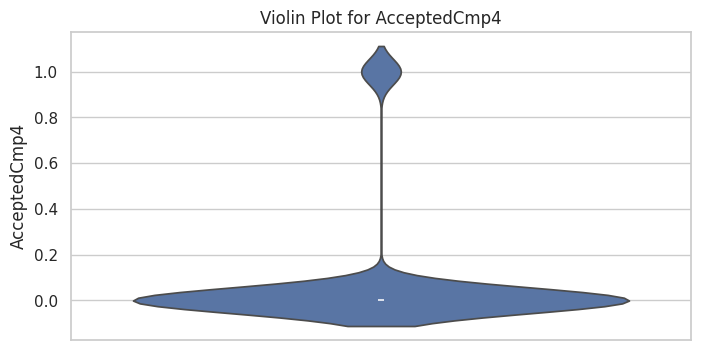

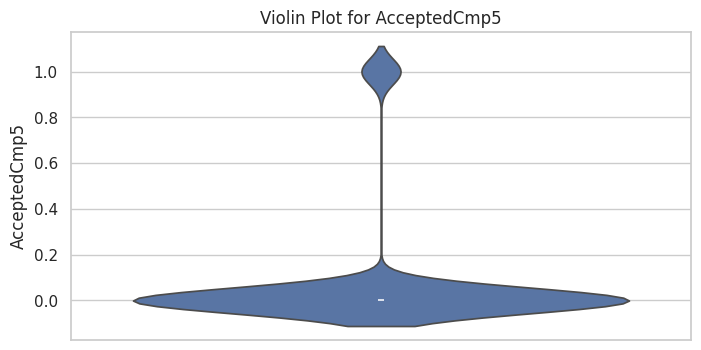

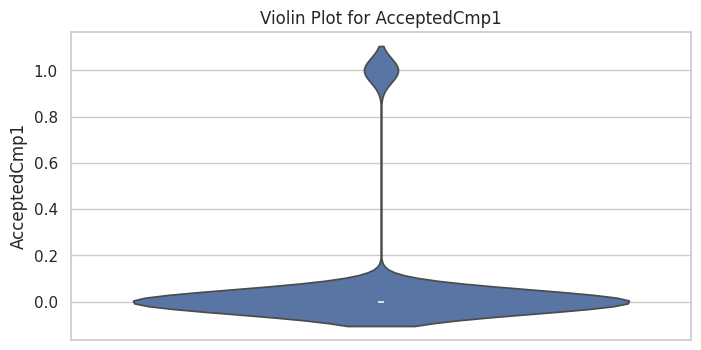

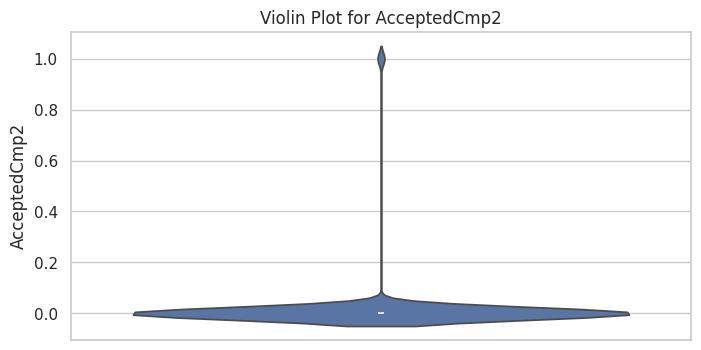

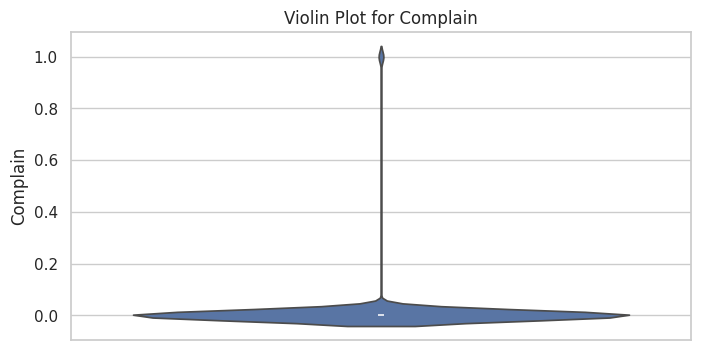

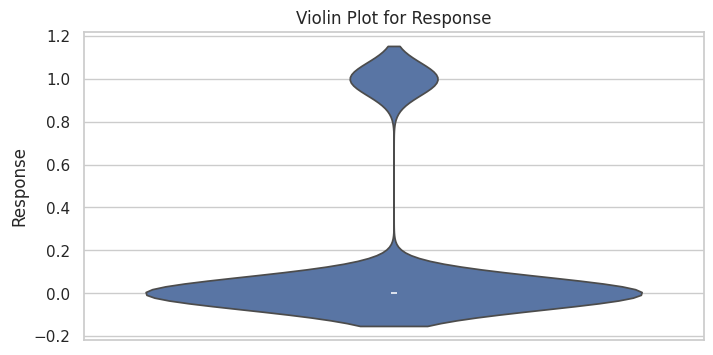

In [9]:
#create violin plot
for col in mc_num:
    plt.figure(figsize=(8, 4))
    sns.violinplot(y=mc_num[col])
    plt.title(f'Violin Plot for {col}')
    plt.show()

##### Grouped Histograms:

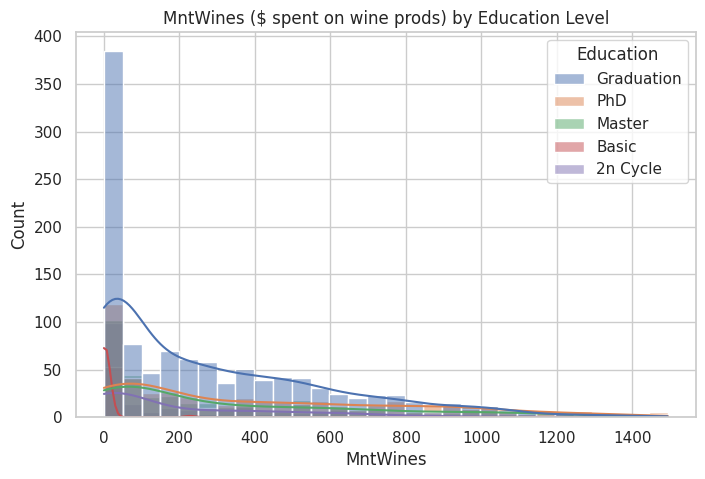

In [10]:
#Distribution of MntWines ($ spent on wine products in last 2 yrs) grouped by Education Level 
plt.figure(figsize=(8, 5))
sns.histplot(data=marketing_campaign, x="MntWines", hue="Education", bins=30, kde=True)
plt.title('MntWines ($ spent on wine prods) by Education Level')
plt.show()

##### Bar Plot for Categorical Counts:

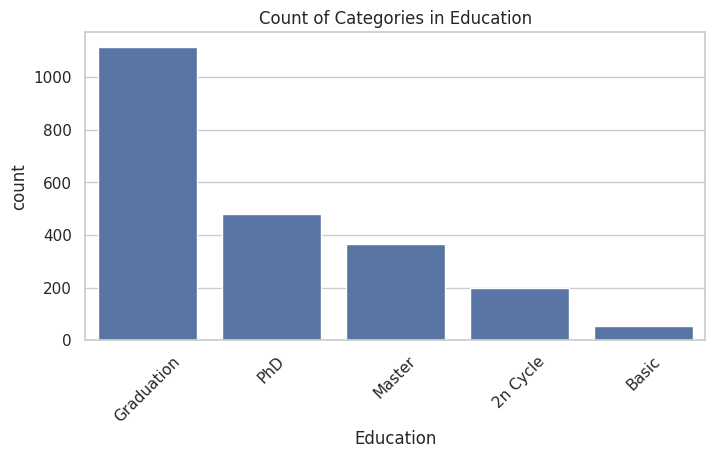

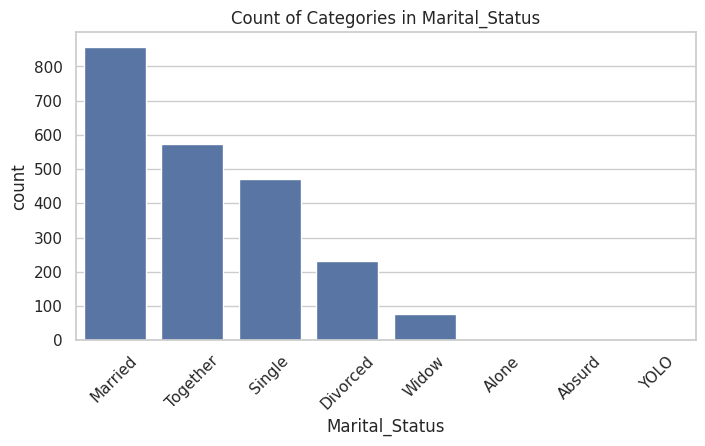

In [11]:
#select only categorical cols
mc_cat = ['Education', 'Marital_Status']

for col in mc_cat:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=marketing_campaign, x=col, order=marketing_campaign[col].value_counts().index)
    plt.title(f'Count of Categories in {col}')
    plt.xticks(rotation=45)
    plt.show()

##### Mean, Median, and Mode:

In [12]:
mc_num.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2216.000000  2216.000000    2216.000000  2216.000000  2216.000000   
mean    5588.353339  1968.820397   52247.251354     0.441787     0.505415   
std     3249.376275    11.985554   25173.076661     0.536896     0.544181   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2814.750000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8421.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2216.000000  2216.000000  2216.000000      2216.000000   
mean     49.012635   305.091606    26.356047       166.995939   
std      28.948352   337.327920    39.793917       224.283273   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    24.000000     2.000000        16.000000   
50%      49.000000   174.500000     8.000000        68.000000   
75%      74.000000   505.000000    33.000000       232.250000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumCatalogPurchases  NumStorePurchases  \
count      2216.000000  ...          2216.000000        2216.000000   
mean         37.637635  ...             2.671029           5.800993   
std          54.752082  ...             2.926734           3.250785   
min           0.000000  ...             0.000000           0.000000   
25%           3.000000  ...             0.000000           3.000000   
50%          12.000000  ...             2.000000           5.000000   
75%          50.000000  ...             4.000000           8.000000   
max         259.000000  ...            28.000000          13.000000   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count        2216.000000   2216.000000   2216.000000   2216.000000   
mean            5.319043      0.073556      0.074007      0.073105   
std             2.425359      0.261106      0.261842      0.260367   
min             0.000000      0.000000      0.000000      0.000000   
25%             3.000000      0.000000      0.000000      0.000000   
50%             6.000000      0.000000      0.000000      0.000000   
75%             7.000000      0.000000      0.000000      0.000000   
max            20.000000      1.000000      1.000000      1.000000   

       AcceptedCmp1  AcceptedCmp2     Complain     Response  
count   2216.000000   2216.000000  2216.000000  2216.000000  
mean       0.064079      0.013538     0.009477     0.150271  
std        0.244950      0.115588     0.096907     0.357417  
min        0.000000      0.000000     0.000000     0.000000  
25%        0.000000      0.000000     0.000000     0.000000  
50%        0.000000      0.000000     0.000000     0.000000  
75%        0.000000      0.000000     0.000000     0.000000  
max        1.000000      1.000000     1.000000     1.000000  

[8 rows x 24 columns]

In [13]:
marketing_campaign.mode(numeric_only=True).iloc[1]

ID                     1.0
Year_Birth             NaN
Income                 NaN
Kidhome                NaN
Teenhome               NaN
Recency                NaN
MntWines               NaN
MntFruits              NaN
MntMeatProducts        NaN
MntFishProducts        NaN
MntSweetProducts       NaN
MntGoldProds           NaN
NumDealsPurchases      NaN
NumWebPurchases        NaN
NumCatalogPurchases    NaN
NumStorePurchases      NaN
NumWebVisitsMonth      NaN
AcceptedCmp3           NaN
AcceptedCmp4           NaN
AcceptedCmp5           NaN
AcceptedCmp1           NaN
AcceptedCmp2           NaN
Complain               NaN
Z_CostContact          NaN
Z_Revenue              NaN
Response               NaN
Name: 1, dtype: float64

##### **Customer Churn Dataset**

In [14]:
#Dataset 2: Customer Churn
#load data
train_cc = pd.read_csv('customer_churn_dataset-training-master.csv')
test_cc = pd.read_csv('customer_churn_dataset-testing-master.csv')
#combine train and test set
customer_churn = pd.concat([train_cc, test_cc], ignore_index=True) #check for rows with null values
nullrows_cc = customer_churn[customer_churn.isnull().any(axis=1)] #check for rows with null values
customer_churn.dropna(inplace=True) #remove null rows
customer_churn.head()

CustomerID   Age  Gender  Tenure  Usage Frequency  Support Calls  \
0         2.0  30.0  Female    39.0             14.0            5.0   
1         3.0  65.0  Female    49.0              1.0           10.0   
2         4.0  55.0  Female    14.0              4.0            6.0   
3         5.0  58.0    Male    38.0             21.0            7.0   
4         6.0  23.0    Male    32.0             20.0            5.0   

   Payment Delay Subscription Type Contract Length  Total Spend  \
0           18.0          Standard          Annual        932.0   
1            8.0             Basic         Monthly        557.0   
2           18.0             Basic       Quarterly        185.0   
3            7.0          Standard         Monthly        396.0   
4            8.0             Basic         Monthly        617.0   

   Last Interaction  Churn  
0              17.0    1.0  
1               6.0    1.0  
2               3.0    1.0  
3              29.0    1.0  
4              20.0    1.0

##### Analysis:
##### Histograms:

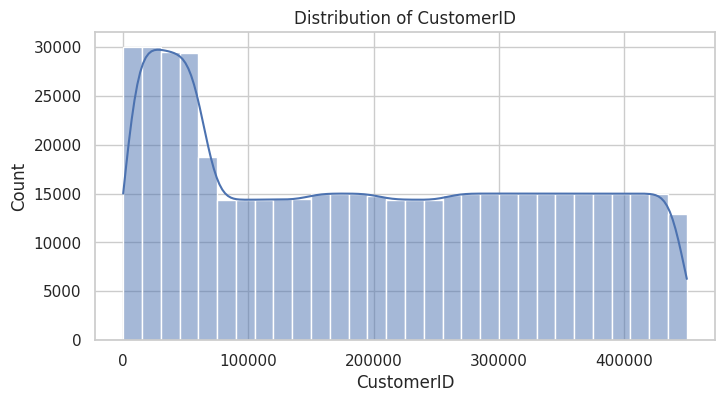

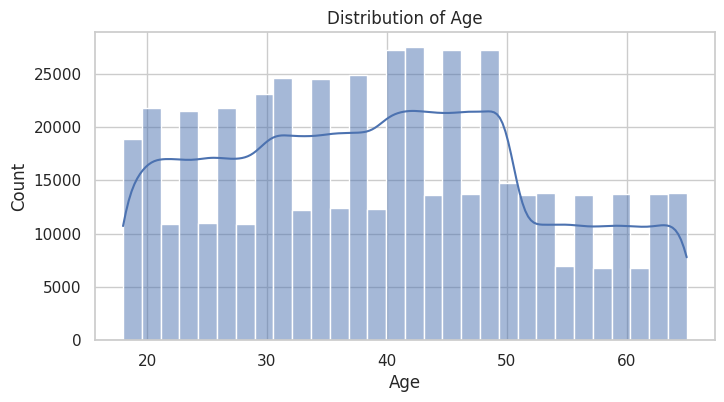

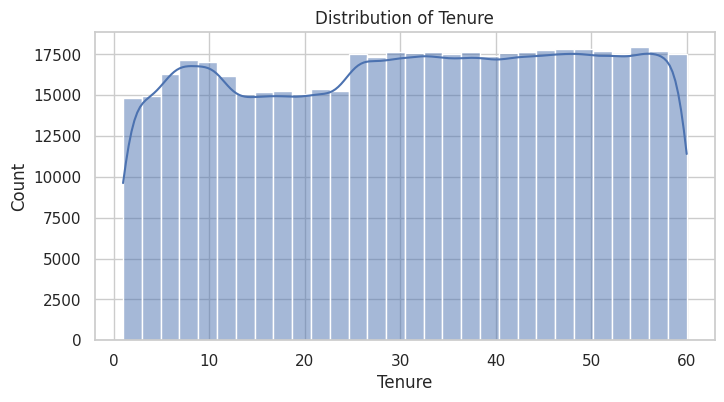

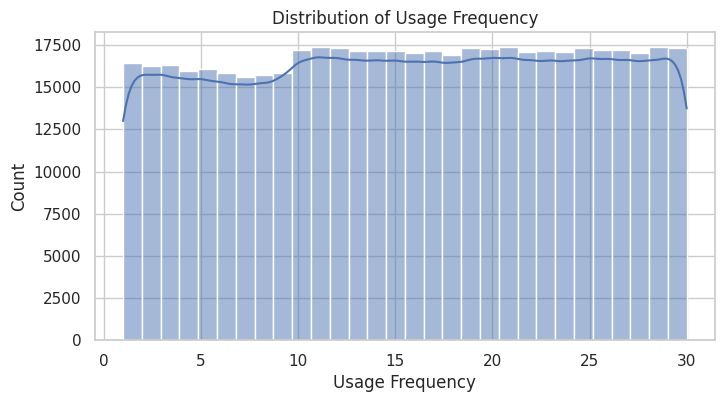

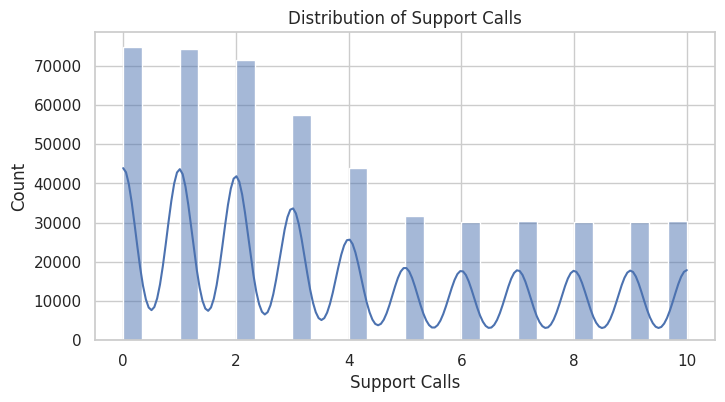

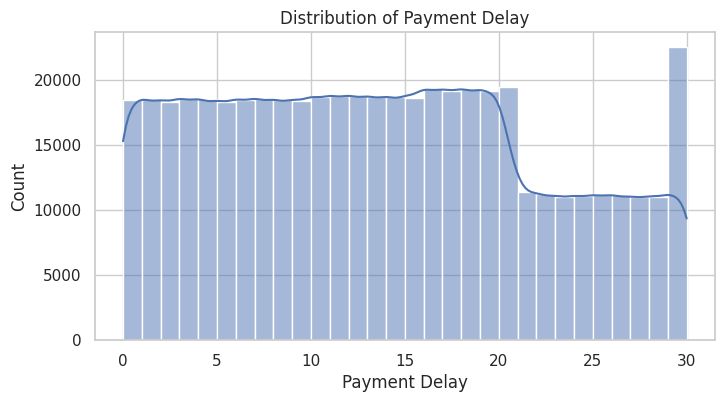

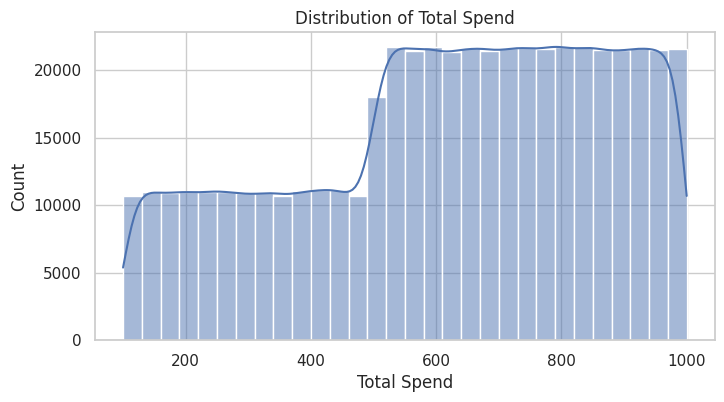

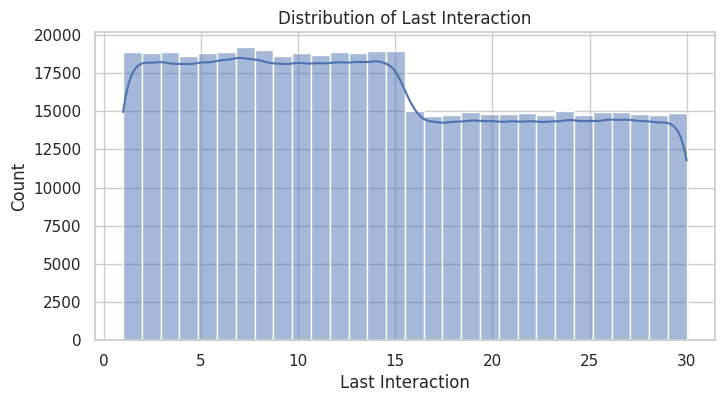

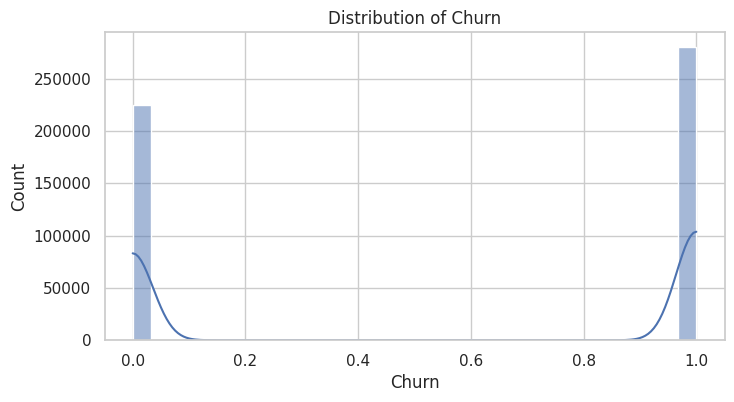

In [15]:
#select only numeric cols:
cc_num = customer_churn.select_dtypes(include='number')
#create histograms
for col in cc_num:
    plt.figure(figsize=(8, 4))
    sns.histplot(cc_num[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

##### KDE (Kernel Density Estimation) Plots:

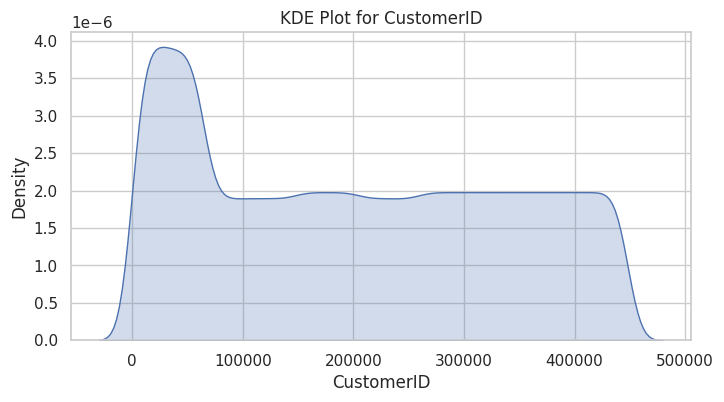

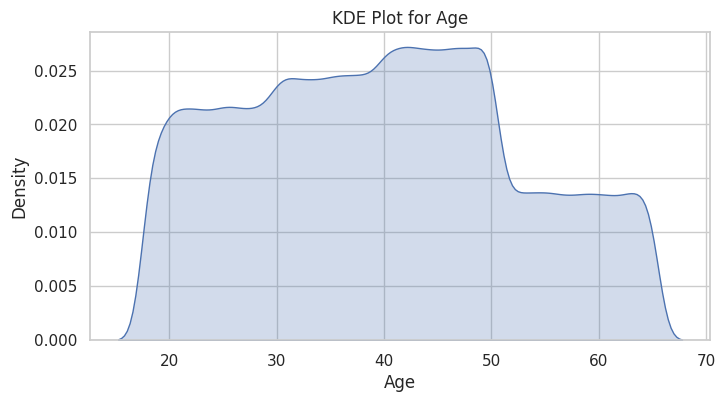

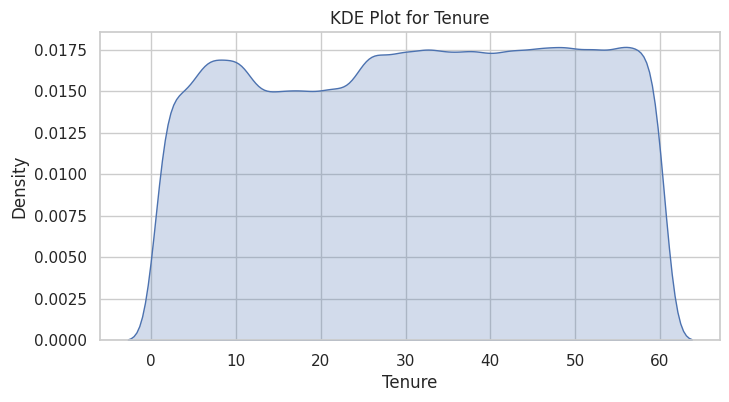

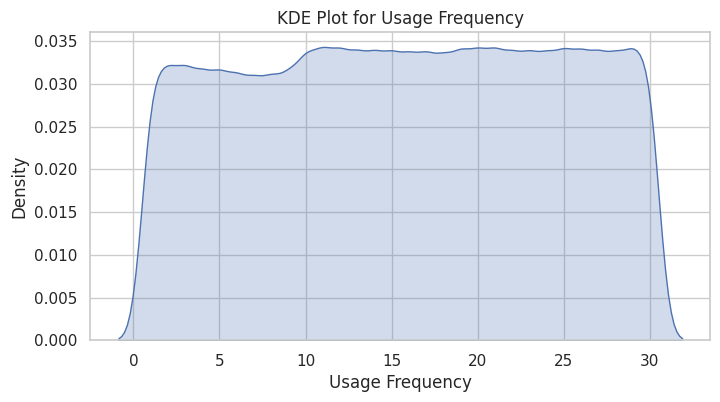

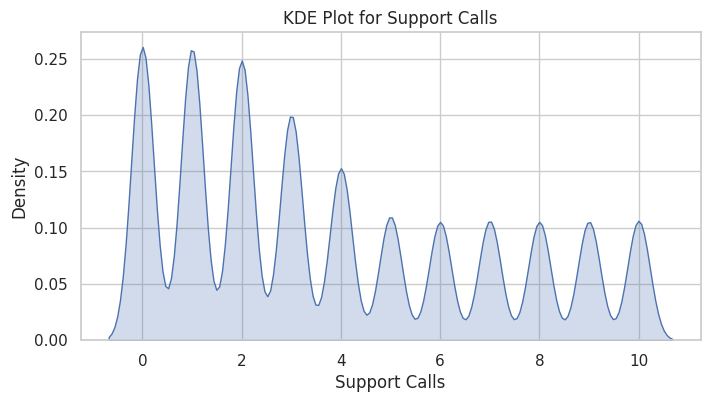

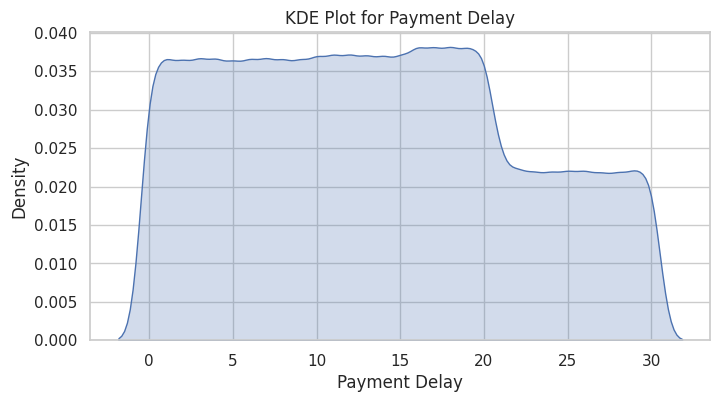

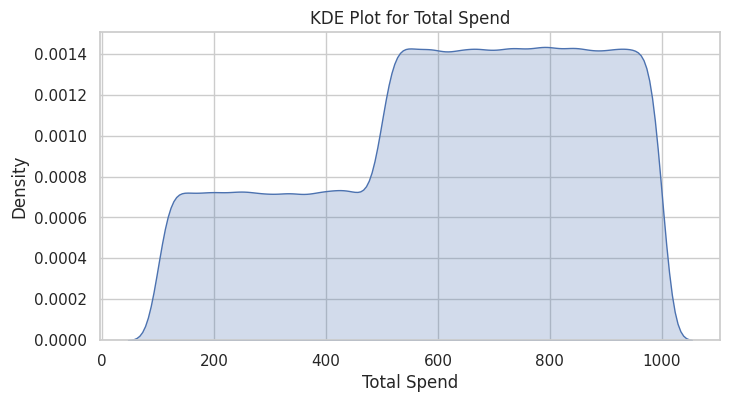

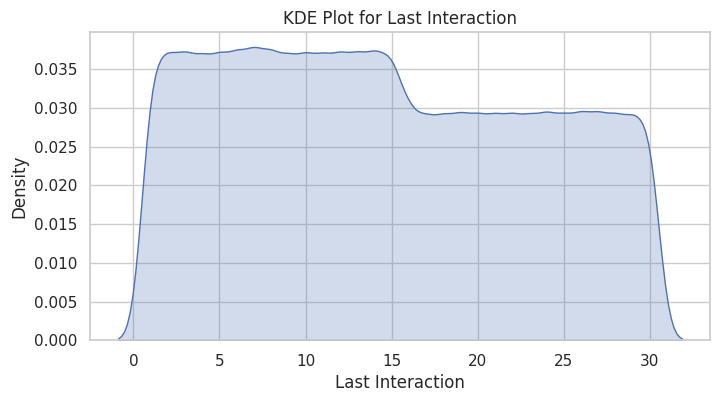

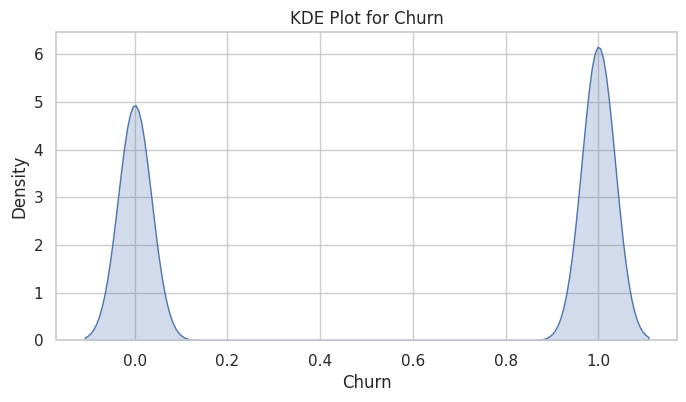

In [16]:
#create KDE plot (Kernel Density Estimation)
for col in cc_num:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(cc_num[col], fill=True)
    plt.title(f'KDE Plot for {col}')
    plt.show()

##### Violin Plots:

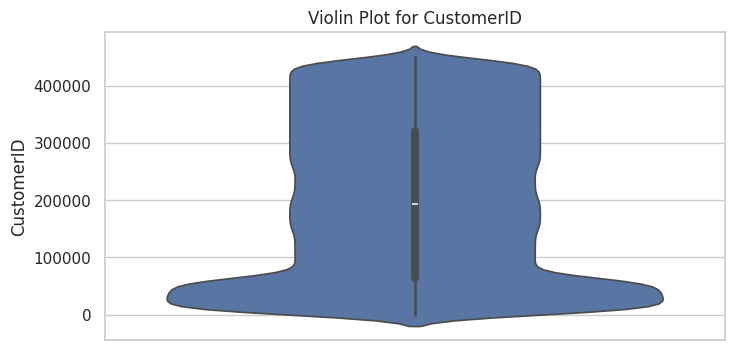

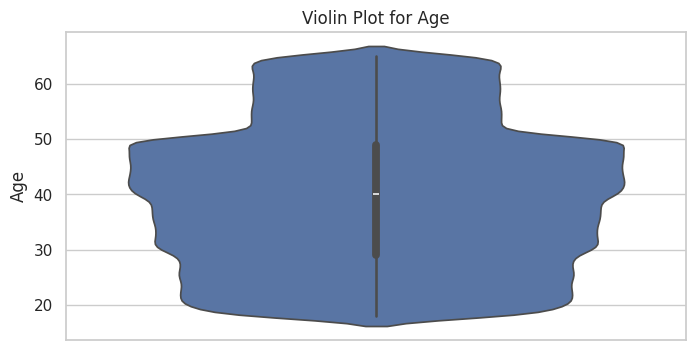

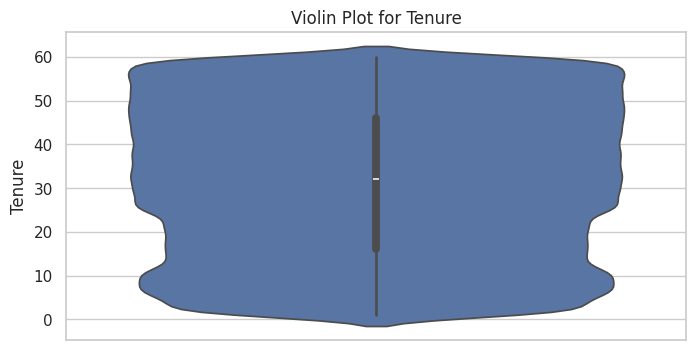

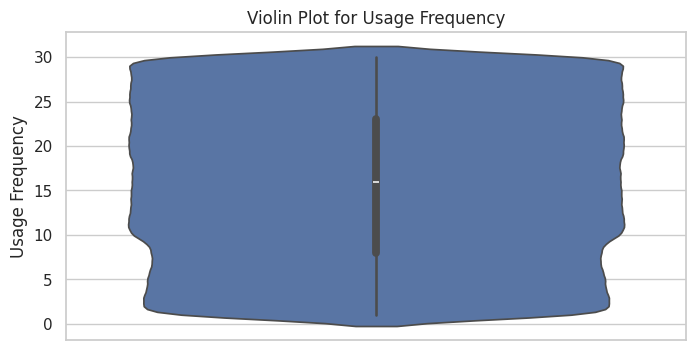

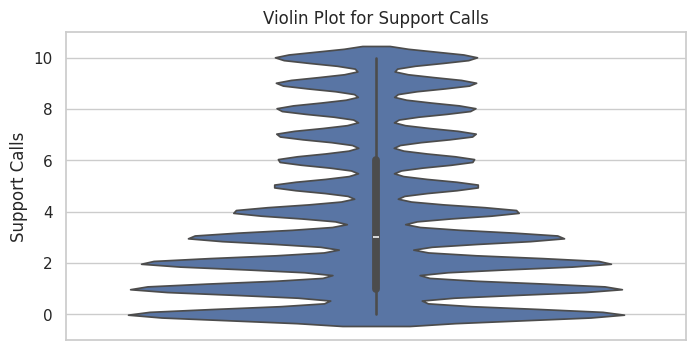

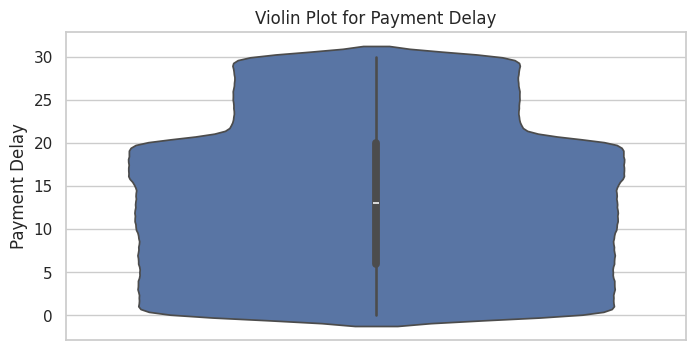

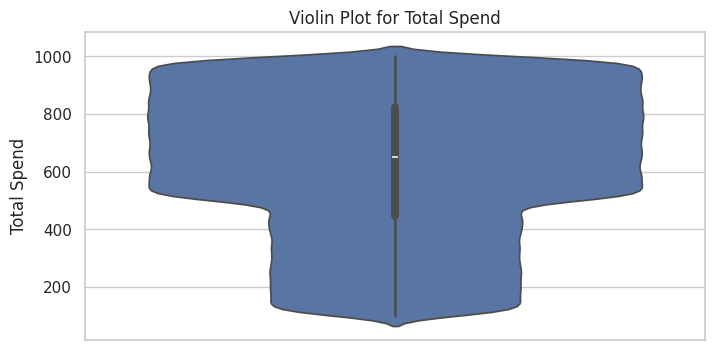

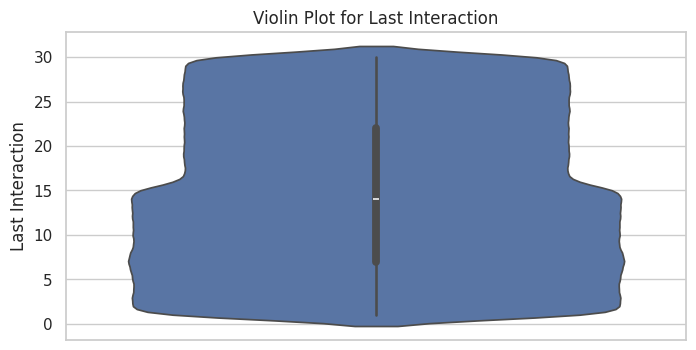

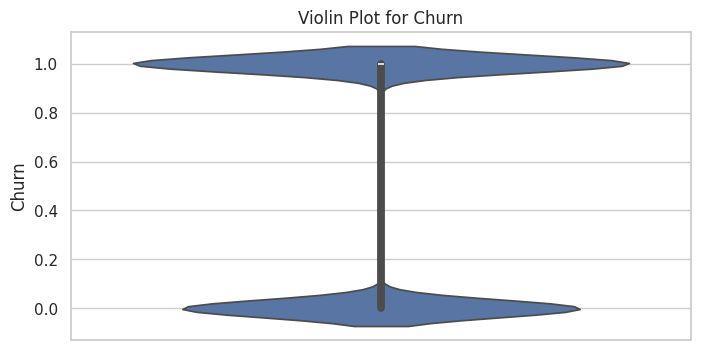

In [17]:
#create violin plot
for col in cc_num:
    plt.figure(figsize=(8, 4))
    sns.violinplot(y=cc_num[col])
    plt.title(f'Violin Plot for {col}')
    plt.show()

##### Grouped Histograms:

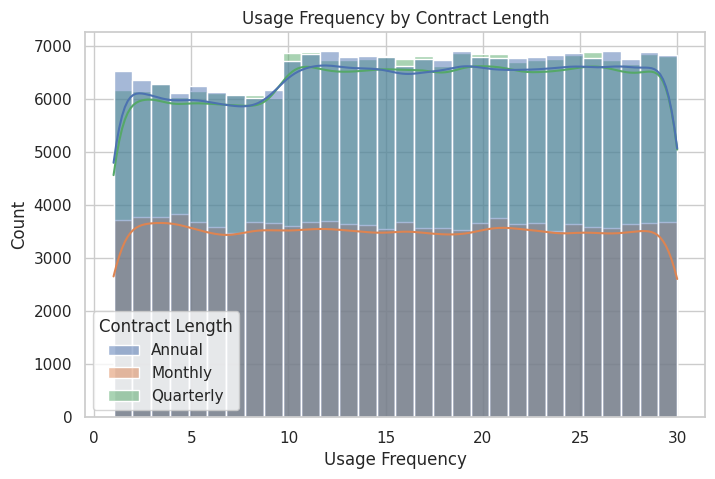

In [18]:
#Distribution of Usage Frequency grouped by Subscription Type 
plt.figure(figsize=(8, 5))
sns.histplot(data=customer_churn, x="Usage Frequency", hue="Contract Length", bins=30, kde=True)
plt.title('Usage Frequency by Contract Length')
plt.show()

##### Bar Plot for Categorical Counts:

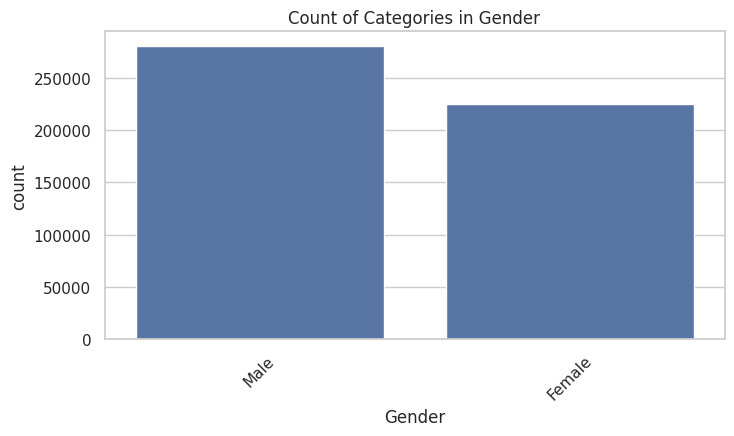

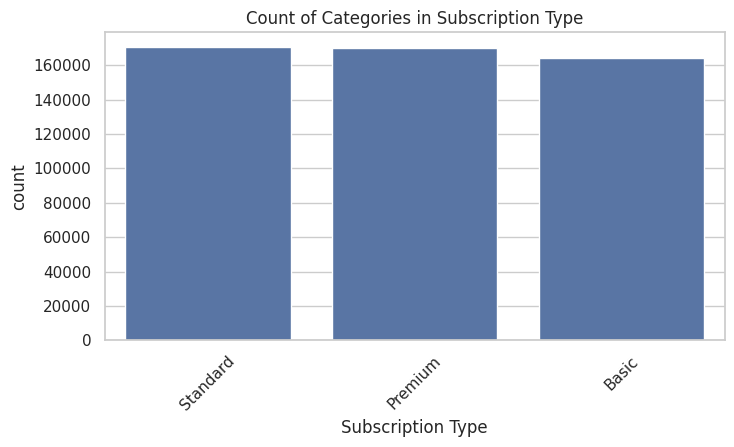

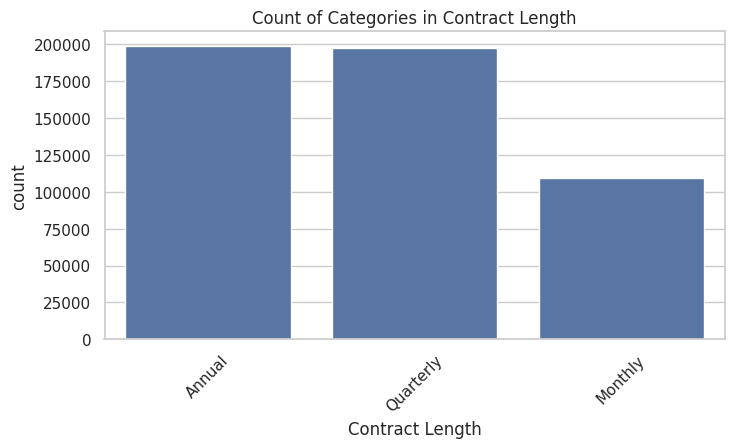

In [19]:
#select only categorical cols
cc_cat = ['Gender', 'Subscription Type', 'Contract Length', ]

for col in cc_cat:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=customer_churn, x=col, order=customer_churn[col].value_counts().index)
    plt.title(f'Count of Categories in {col}')
    plt.xticks(rotation=45)
    plt.show()

##### Mean, Median, and Mode:

In [20]:
cc_num.describe()

CustomerID            Age         Tenure  Usage Frequency  \
count  505206.000000  505206.000000  505206.000000    505206.000000   
mean   200779.451782      39.704172      31.350435        15.714825   
std    137241.343095      12.670577      17.237482         8.619323   
min         1.000000      18.000000       1.000000         1.000000   
25%     63827.250000      29.000000      16.000000         8.000000   
50%    193039.500000      40.000000      32.000000        16.000000   
75%    321645.750000      49.000000      46.000000        23.000000   
max    449999.000000      65.000000      60.000000        30.000000   

       Support Calls  Payment Delay    Total Spend  Last Interaction  \
count  505206.000000  505206.000000  505206.000000     505206.000000   
mean        3.833317      13.496843     620.072766         14.610581   
std         3.133603       8.451187     245.319256          8.608286   
min         0.000000       0.000000     100.000000          1.000000   
25%         1.000000       6.000000     446.000000          7.000000   
50%         3.000000      13.000000     648.900000         14.000000   
75%         6.000000      20.000000     824.000000         22.000000   
max        10.000000      30.000000    1000.000000         30.000000   

               Churn  
count  505206.000000  
mean        0.555203  
std         0.496944  
min         0.000000  
25%         0.000000  
50%         1.000000  
75%         1.000000  
max         1.000000

In [21]:
customer_churn.mode(numeric_only=True).iloc[1]

CustomerID            3.0
Age                   NaN
Tenure                NaN
Usage Frequency       NaN
Support Calls         NaN
Payment Delay         NaN
Total Spend         432.0
Last Interaction      NaN
Churn                 NaN
Name: 1, dtype: float64

##### **Digital Marketing Campaign Dataset**

##### Load Dataset:

In [22]:
dm_campaign = pd.read_csv('digital_marketing_campaign_dataset.csv')
dm_campaign.head() #display first couple rows

CustomerID  Age  Gender  Income CampaignChannel CampaignType      AdSpend  \
0        8000   56  Female  136912    Social Media    Awareness  6497.870068   
1        8001   69    Male   41760           Email    Retention  3898.668606   
2        8002   46  Female   88456             PPC    Awareness  1546.429596   
3        8003   32  Female   44085             PPC   Conversion   539.525936   
4        8004   60  Female   83964             PPC   Conversion  1678.043573   

   ClickThroughRate  ConversionRate  WebsiteVisits  PagesPerVisit  TimeOnSite  \
0          0.043919        0.088031              0       2.399017    7.396803   
1          0.155725        0.182725             42       2.917138    5.352549   
2          0.277490        0.076423              2       8.223619   13.794901   
3          0.137611        0.088004             47       4.540939   14.688363   
4          0.252851        0.109940              0       2.046847   13.993370   

   SocialShares  EmailOpens  EmailClicks  PreviousPurchases  LoyaltyPoints  \
0            19           6            9                  4            688   
1             5           2            7                  2           3459   
2             0          11            2                  8           2337   
3            89           2            2                  0           2463   
4             6           6            6                  8           4345   

  AdvertisingPlatform AdvertisingTool  Conversion  
0            IsConfid      ToolConfid           1  
1            IsConfid      ToolConfid           1  
2            IsConfid      ToolConfid           1  
3            IsConfid      ToolConfid           1  
4            IsConfid      ToolConfid           1

#### Analysis:

##### Histograms:

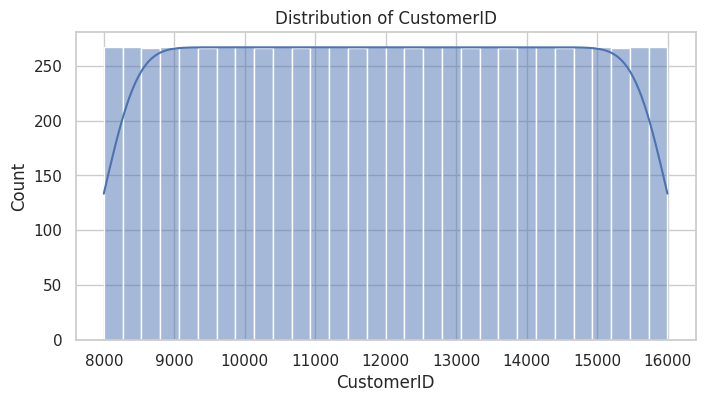

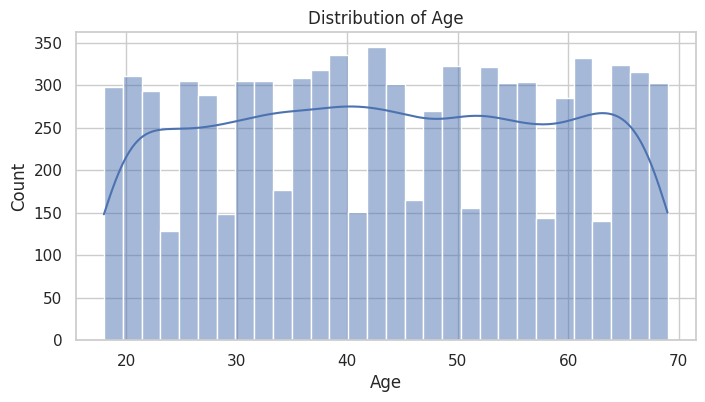

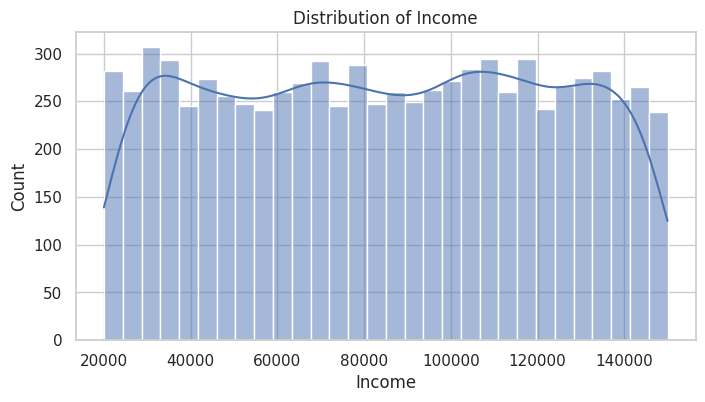

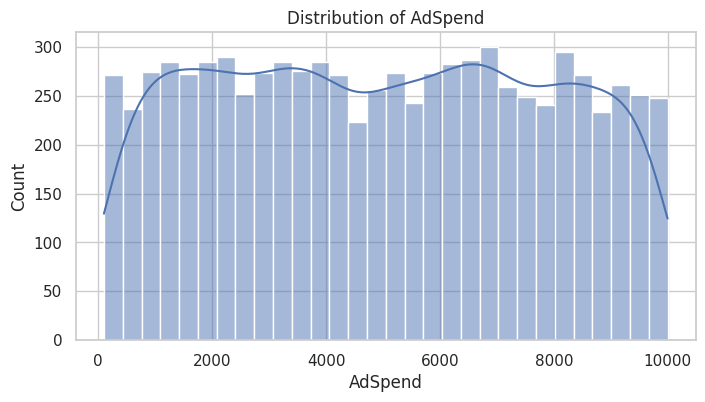

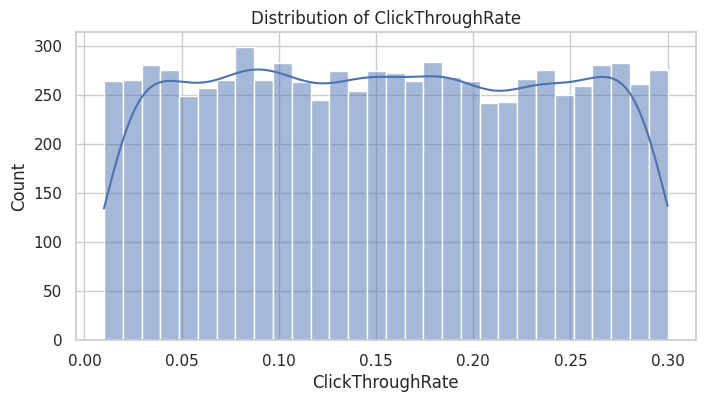

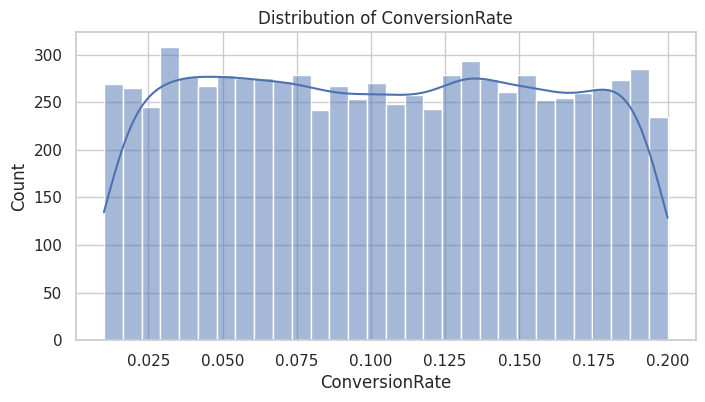

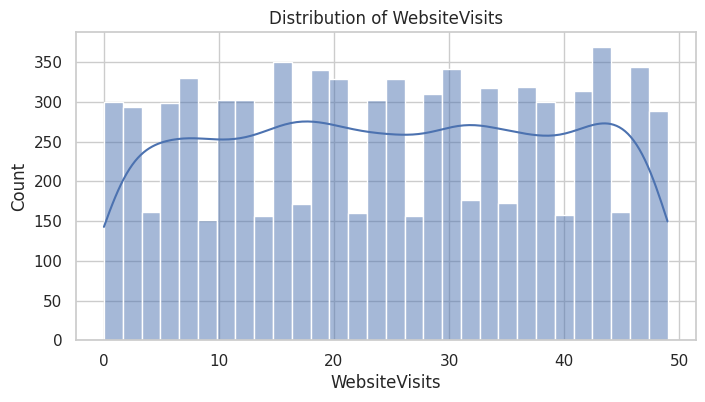

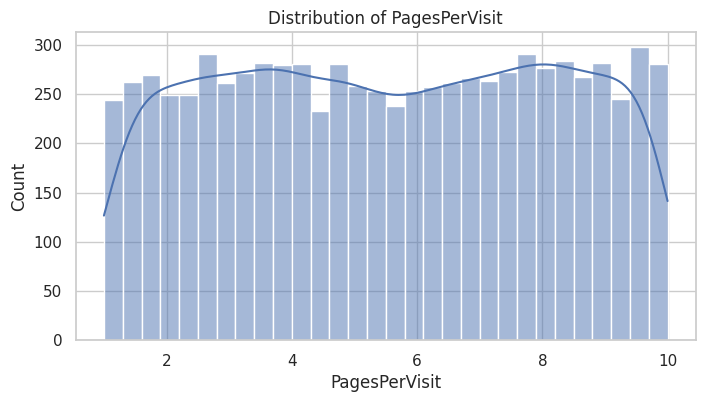

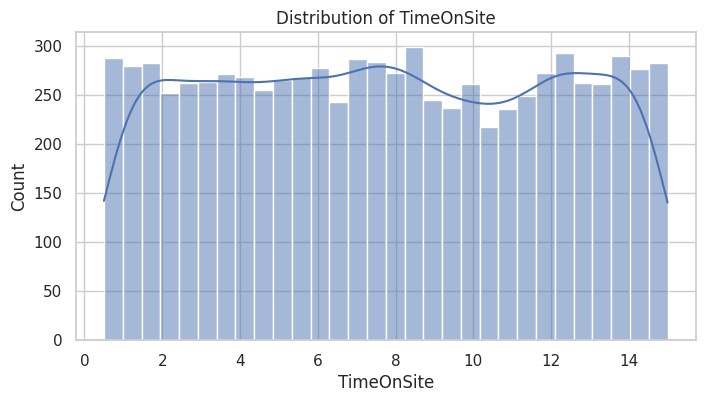

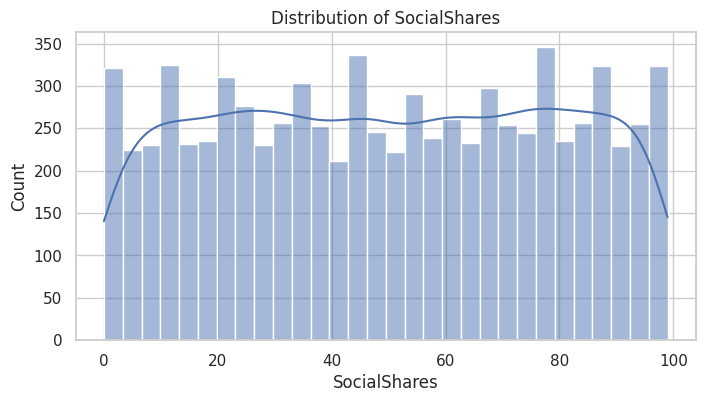

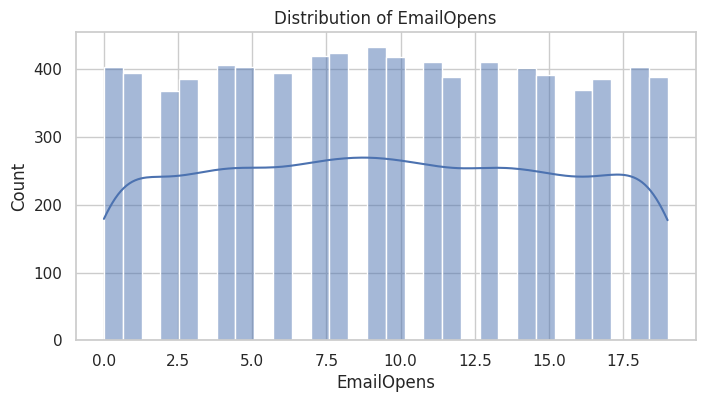

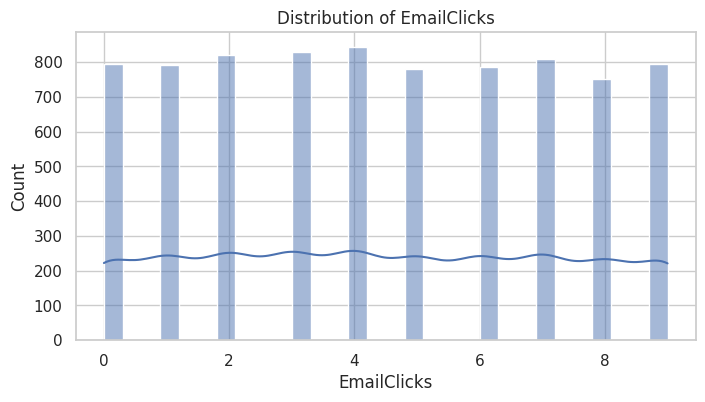

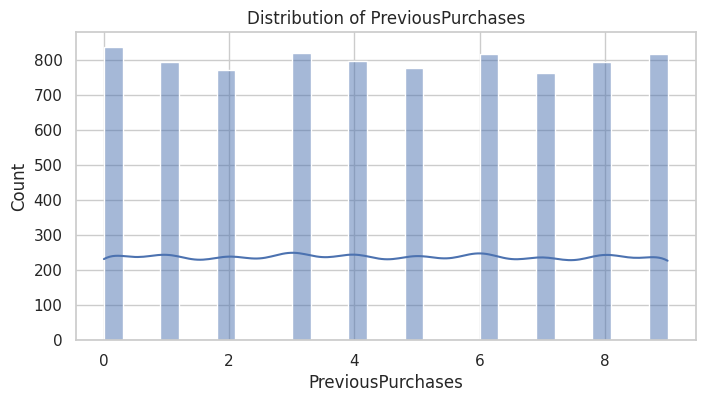

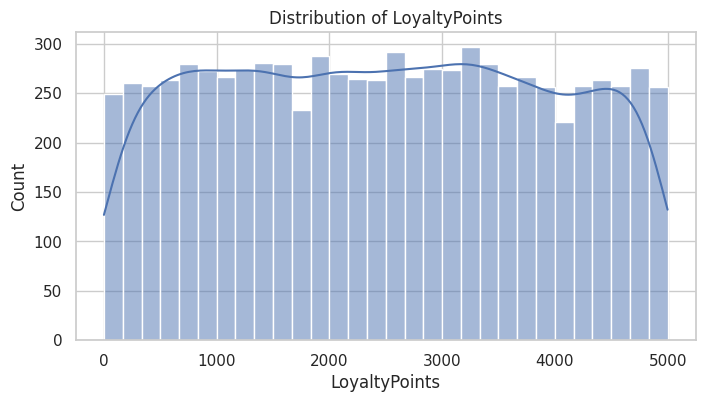

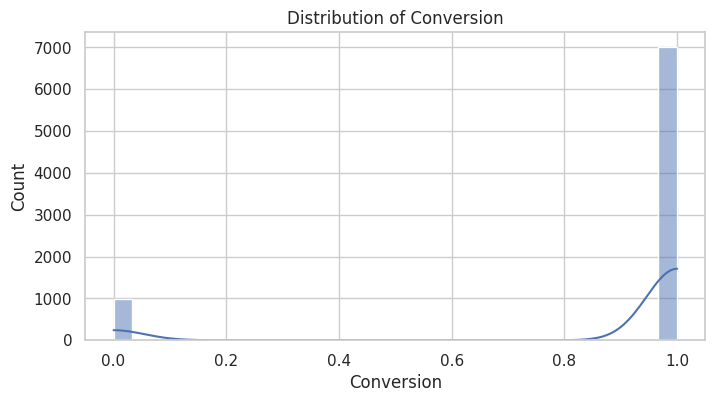

In [23]:
#select only numeric cols:
dm_num = dm_campaign.select_dtypes(include='number')
#create histograms
for col in dm_num:
    plt.figure(figsize=(8, 4))
    sns.histplot(dm_num[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

##### KDE (Kernel Density Estimation) Plots:

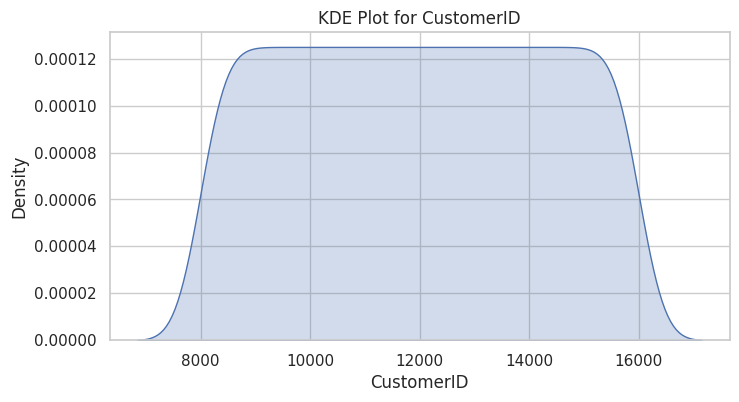

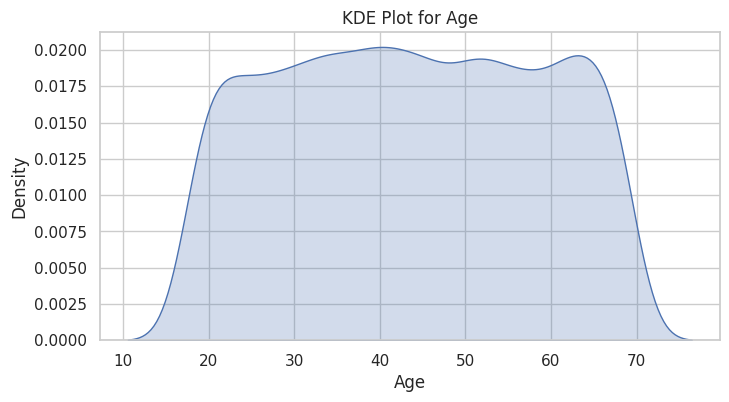

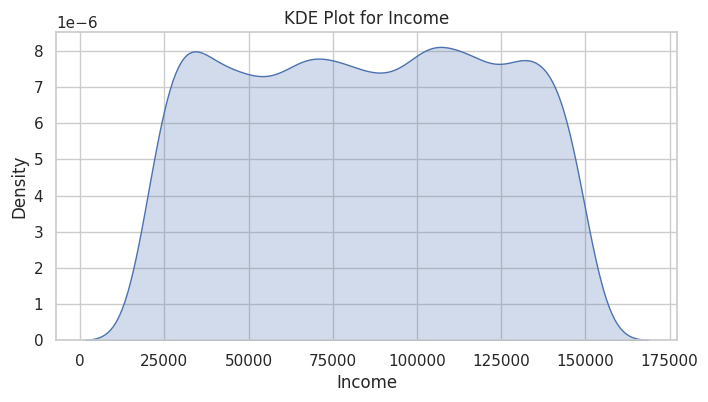

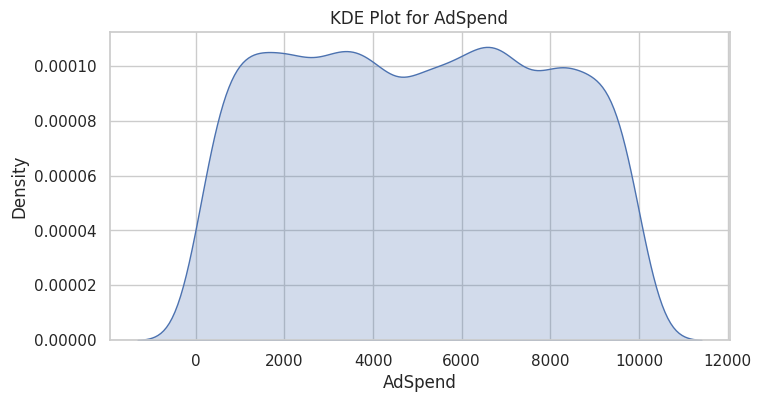

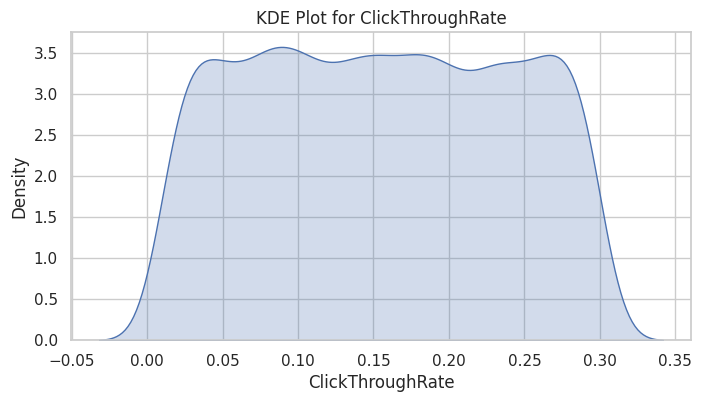

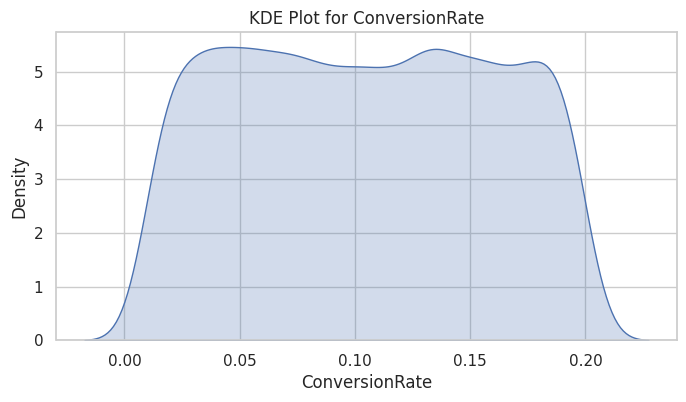

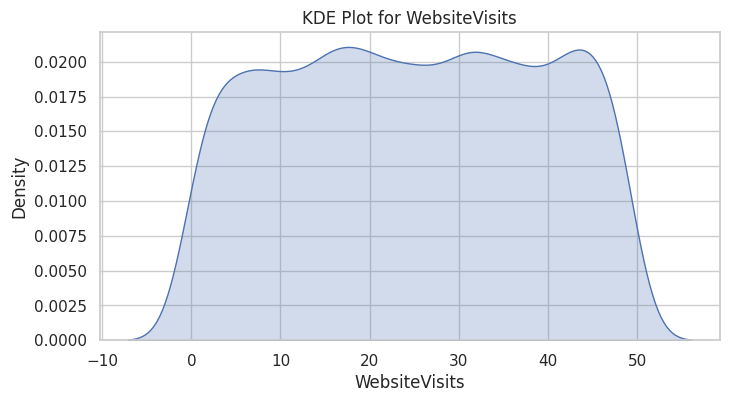

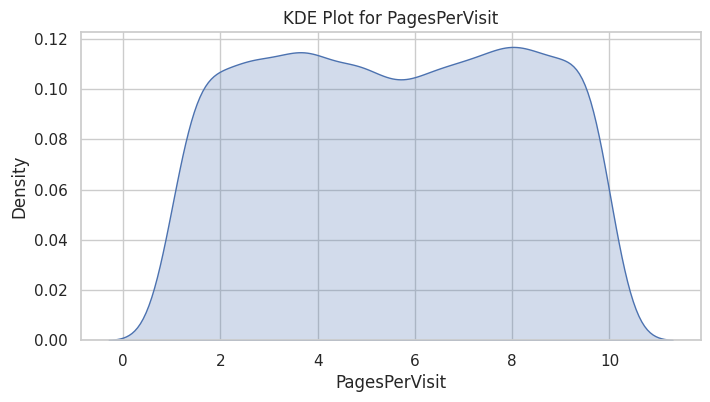

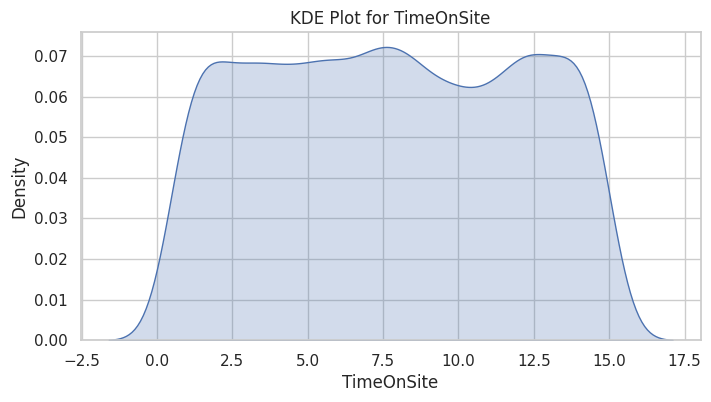

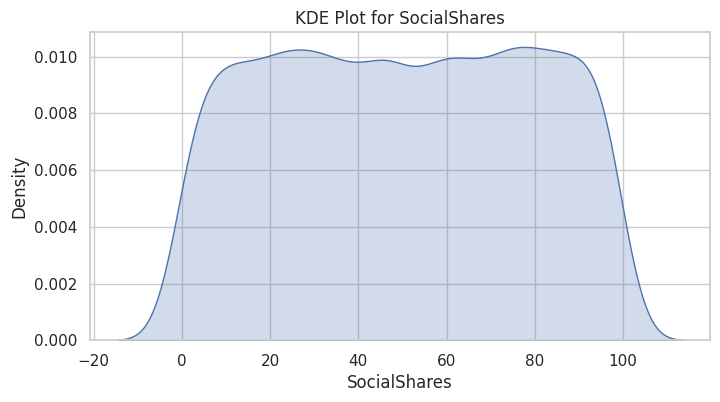

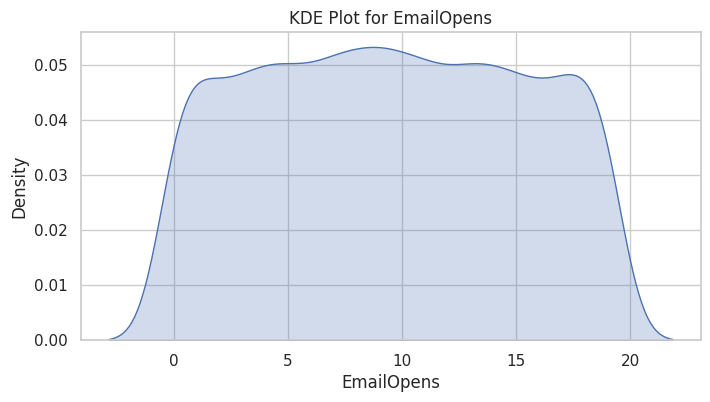

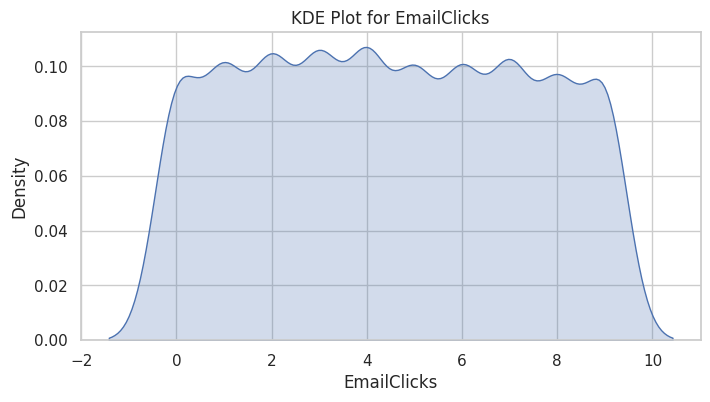

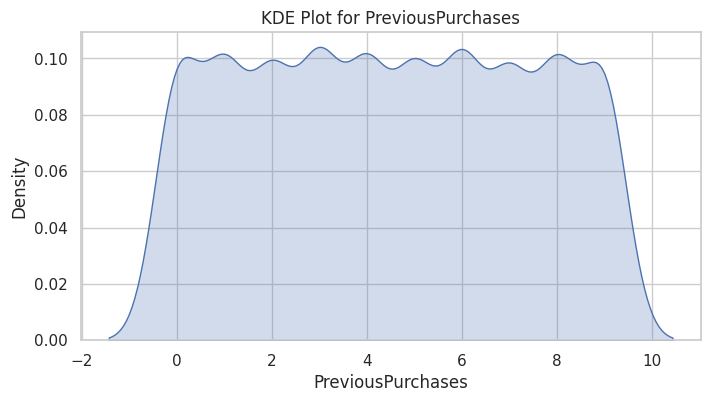

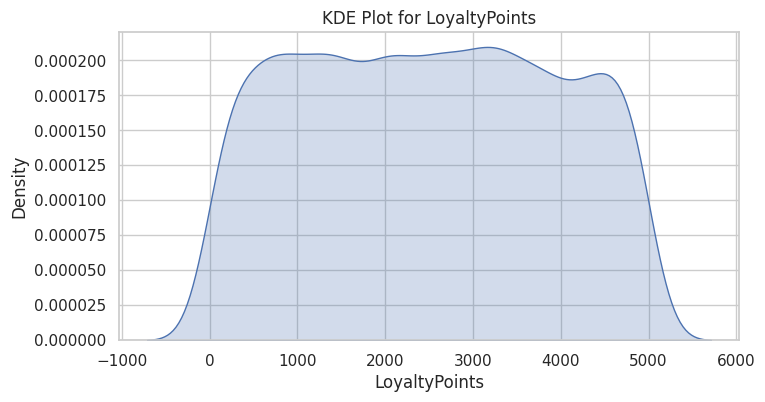

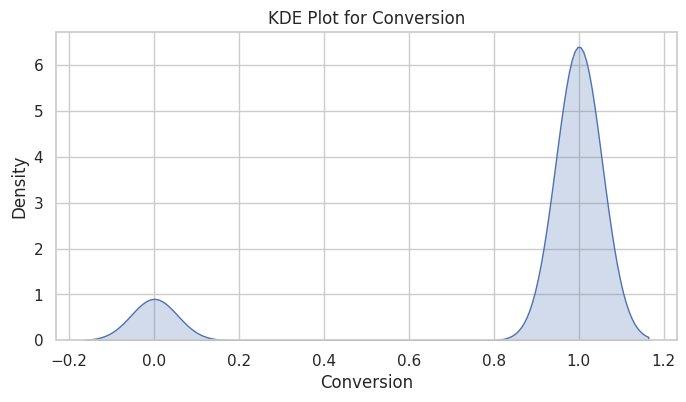

In [24]:
#create KDE plot (Kernel Density Estimation)
for col in dm_num:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(dm_num[col], fill=True)
    plt.title(f'KDE Plot for {col}')
    plt.show()

##### Violin Plots:

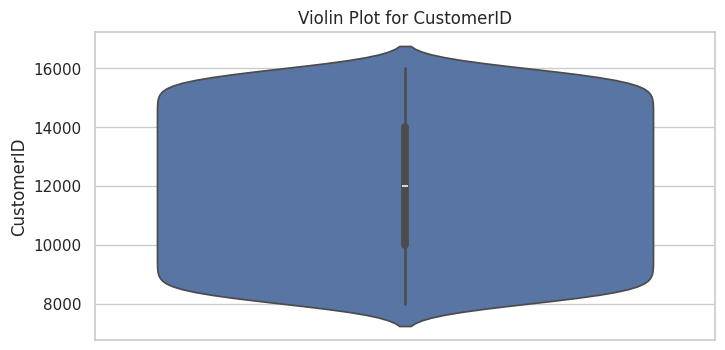

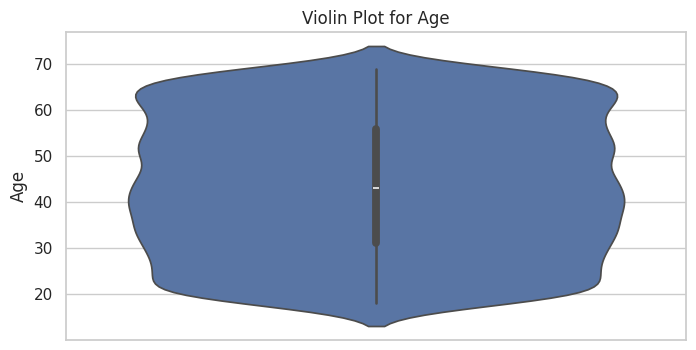

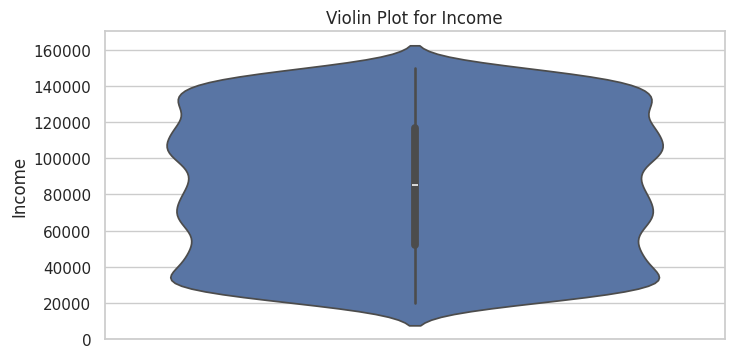

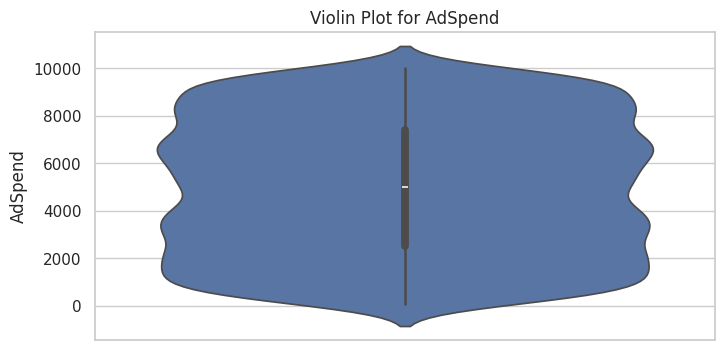

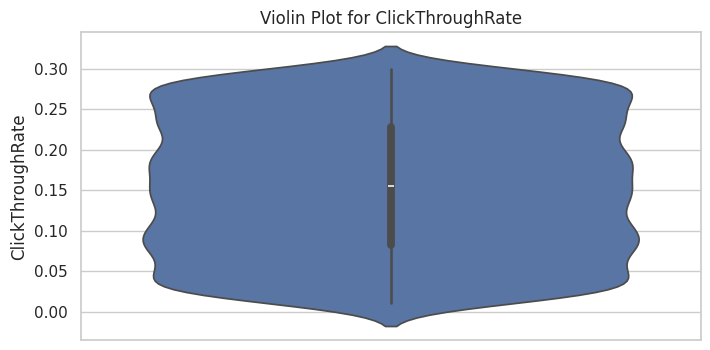

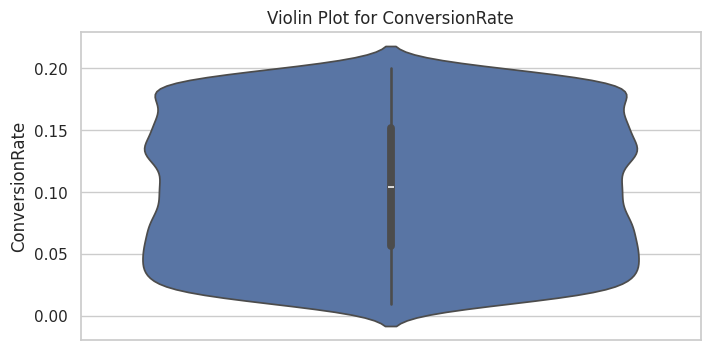

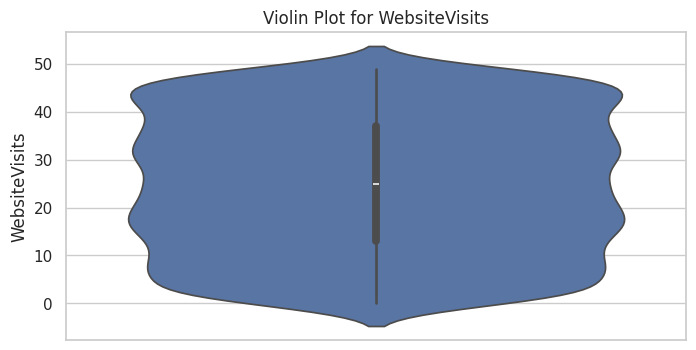

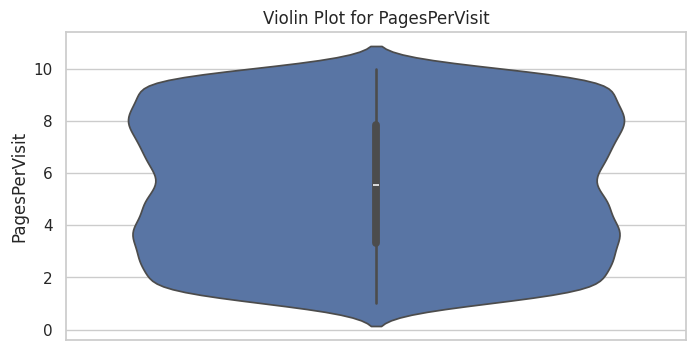

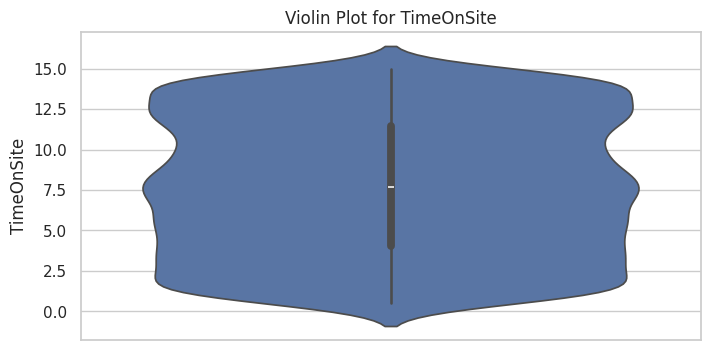

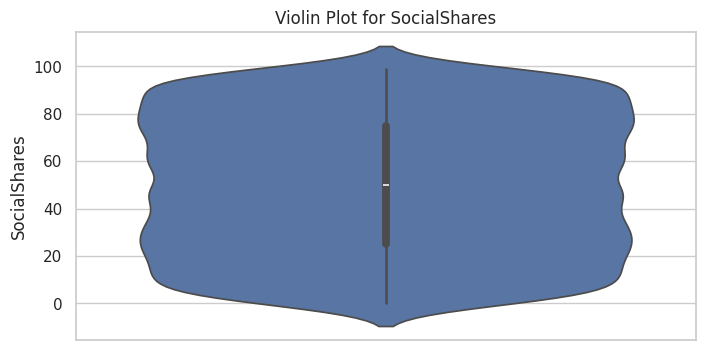

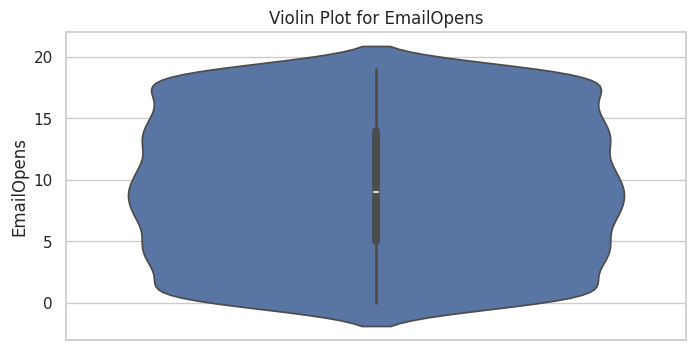

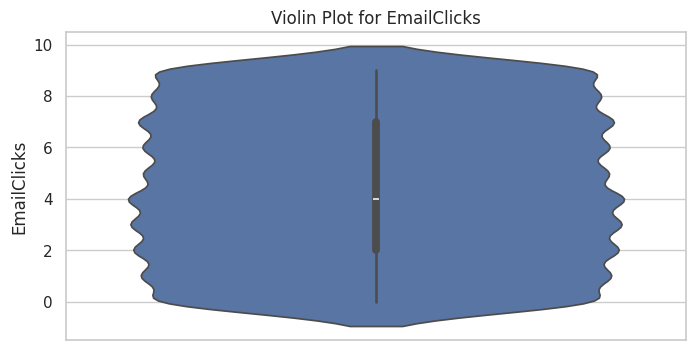

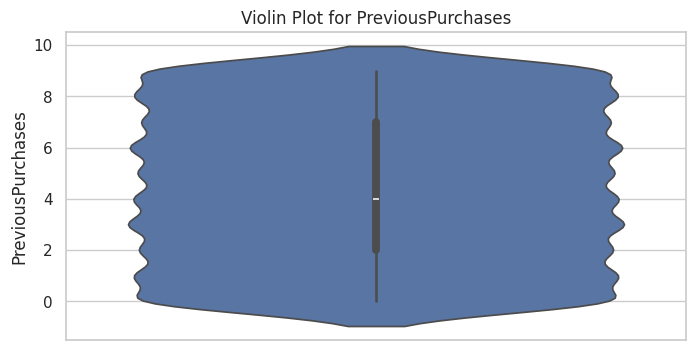

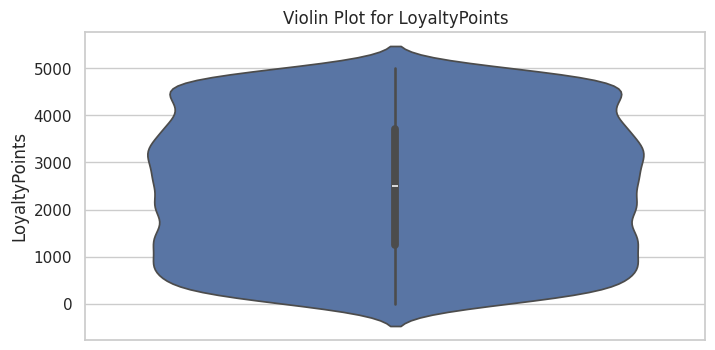

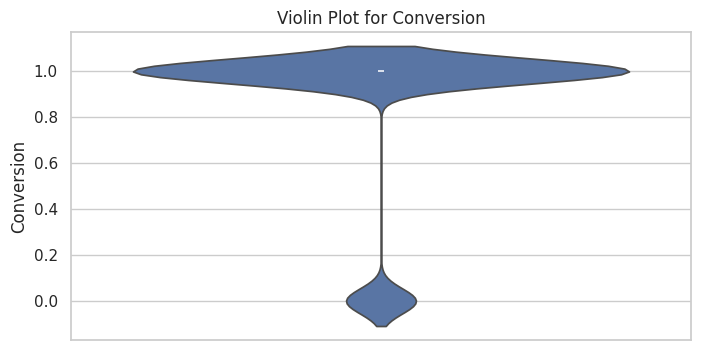

In [25]:
#create violin Plot
for col in dm_num:
    plt.figure(figsize=(8, 4))
    sns.violinplot(y=dm_num[col])
    plt.title(f'Violin Plot for {col}')
    plt.show()

##### Grouped Histograms:

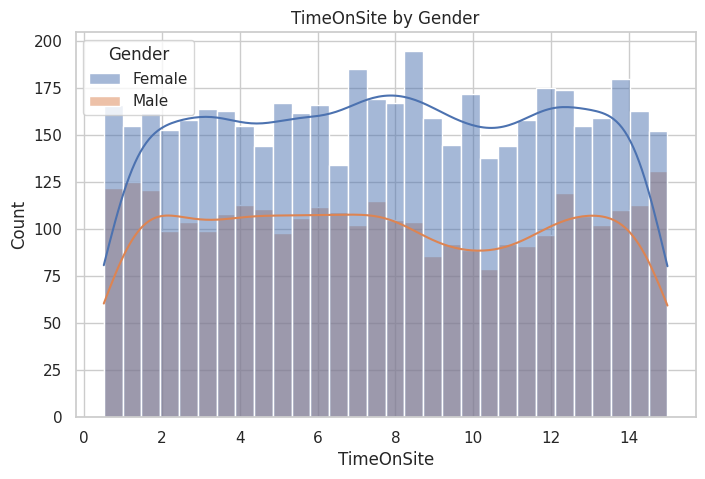

In [26]:
#Distribution of TimeOnSite grouped by Gender 
plt.figure(figsize=(8, 5))
sns.histplot(data=dm_campaign, x="TimeOnSite", hue="Gender", bins=30, kde=True)
plt.title('TimeOnSite by Gender')
plt.show()

##### Bar Plot for Categorical Counts:

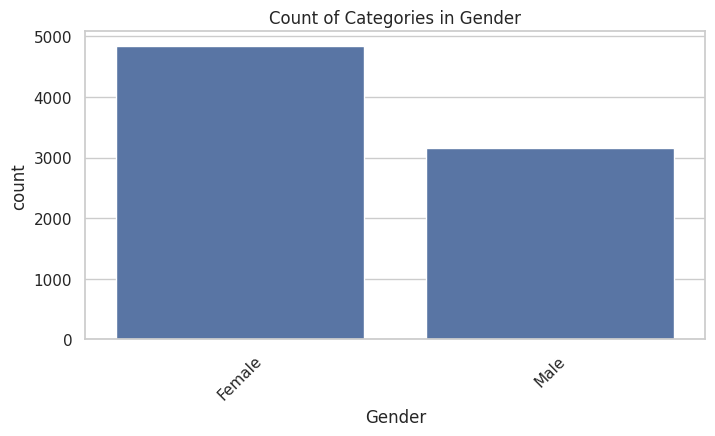

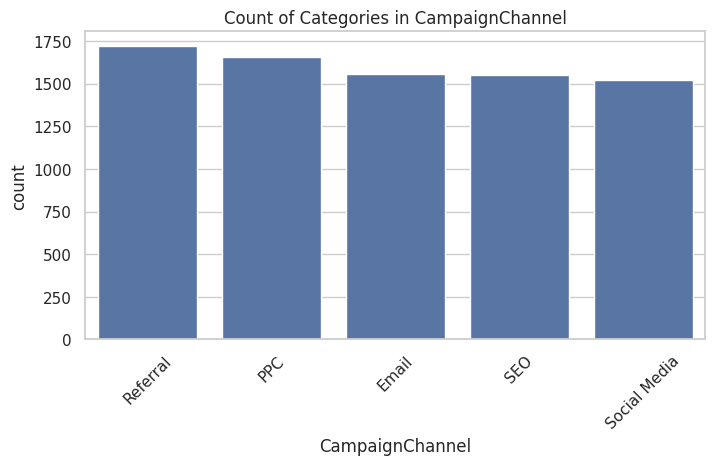

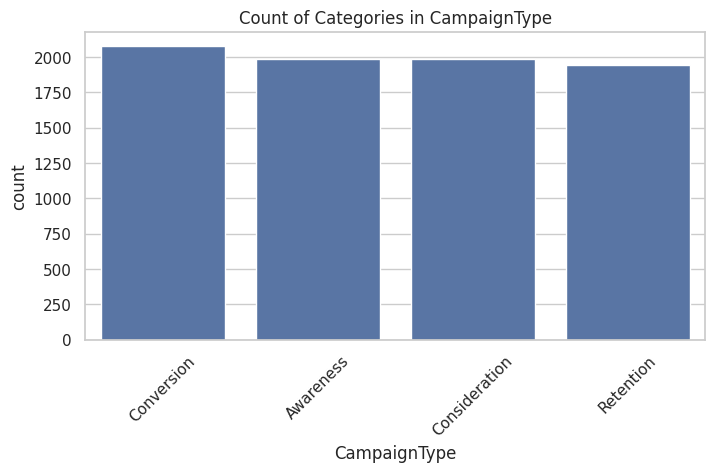

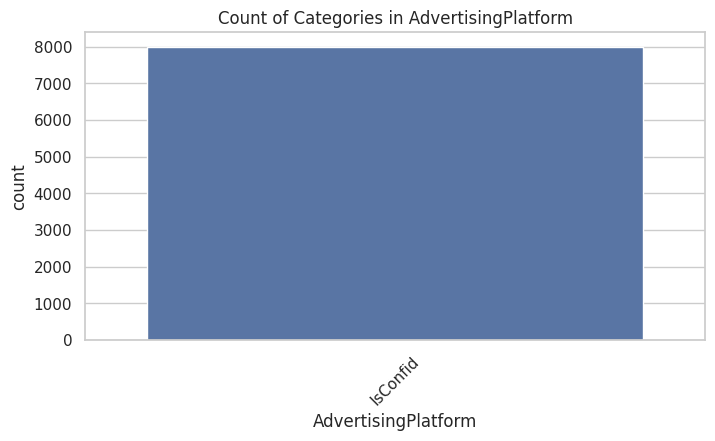

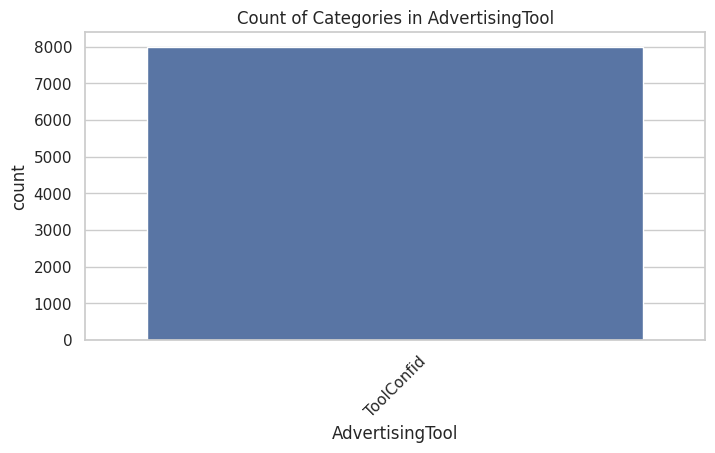

In [27]:
categorical_cols = ['Gender', 'CampaignChannel', 'CampaignType', 'AdvertisingPlatform', 'AdvertisingTool']

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=dm_campaign, x=col, order=dm_campaign[col].value_counts().index)
    plt.title(f'Count of Categories in {col}')
    plt.xticks(rotation=45)
    plt.show()

##### Mean, Median, and Mode:

In [28]:
dm_num.describe()

CustomerID          Age         Income      AdSpend  ClickThroughRate  \
count   8000.00000  8000.000000    8000.000000  8000.000000       8000.000000   
mean   11999.50000    43.625500   84664.196750  5000.944830          0.154829   
std     2309.54541    14.902785   37580.387945  2838.038153          0.084007   
min     8000.00000    18.000000   20014.000000   100.054813          0.010005   
25%     9999.75000    31.000000   51744.500000  2523.221165          0.082635   
50%    11999.50000    43.000000   84926.500000  5013.440044          0.154505   
75%    13999.25000    56.000000  116815.750000  7407.989369          0.228207   
max    15999.00000    69.000000  149986.000000  9997.914781          0.299968   

       ConversionRate  WebsiteVisits  PagesPerVisit   TimeOnSite  \
count     8000.000000    8000.000000    8000.000000  8000.000000   
mean         0.104389      24.751625       5.549299     7.727718   
std          0.054878      14.312269       2.607358     4.228218   
min          0.010018       0.000000       1.000428     0.501669   
25%          0.056410      13.000000       3.302479     4.068340   
50%          0.104046      25.000000       5.534257     7.682956   
75%          0.152077      37.000000       7.835756    11.481468   
max          0.199995      49.000000       9.999055    14.995311   

       SocialShares   EmailOpens  EmailClicks  PreviousPurchases  \
count   8000.000000  8000.000000  8000.000000        8000.000000   
mean      49.799750     9.476875     4.467375           4.485500   
std       28.901165     5.711111     2.856564           2.888093   
min        0.000000     0.000000     0.000000           0.000000   
25%       25.000000     5.000000     2.000000           2.000000   
50%       50.000000     9.000000     4.000000           4.000000   
75%       75.000000    14.000000     7.000000           7.000000   
max       99.000000    19.000000     9.000000           9.000000   

       LoyaltyPoints   Conversion  
count    8000.000000  8000.000000  
mean     2490.268500     0.876500  
std      1429.527162     0.329031  
min         0.000000     0.000000  
25%      1254.750000     1.000000  
50%      2497.000000     1.000000  
75%      3702.250000     1.000000  
max      4999.000000     1.000000

In [29]:
marketing_campaign.mode(numeric_only=True).iloc[1]

ID                     1.0
Year_Birth             NaN
Income                 NaN
Kidhome                NaN
Teenhome               NaN
Recency                NaN
MntWines               NaN
MntFruits              NaN
MntMeatProducts        NaN
MntFishProducts        NaN
MntSweetProducts       NaN
MntGoldProds           NaN
NumDealsPurchases      NaN
NumWebPurchases        NaN
NumCatalogPurchases    NaN
NumStorePurchases      NaN
NumWebVisitsMonth      NaN
AcceptedCmp3           NaN
AcceptedCmp4           NaN
AcceptedCmp5           NaN
AcceptedCmp1           NaN
AcceptedCmp2           NaN
Complain               NaN
Z_CostContact          NaN
Z_Revenue              NaN
Response               NaN
Name: 1, dtype: float64

#### Conclusions:

##### Overall:
* The dataset appears to be comprehensive and relevant. It captures key aspects of user behavior, marketing channels, and performance metrics. Most of the columns contain data in expected formats and ranges (i.e., Age is withing a reasonable adult range). There are no glaring data quality issues such as missing columns. Based on this, the dataset is usable and suitable for EDA, modeling, and campaign omptimization.

##### Distribution:
* Most numeric features are right-skewed, especially AdSpend, Income, WebsiteVisits, and TimeOnSite. This is typical in marketing datasets where a small group of customers may spend or engage more than the average population.
* Some features exhibit about normal distributions, such as Age and LoyaltyPoints, suggesting a more balances distribution across those variables.
* Bimodal patterns appear in metrics like PagesPerVisit and TimeOnSite where user behavior splits between casual and highly engaged users. 

##### Outliers:
* There are outliers present in features such as Income, AdSpend, TimeOnSite, and WebsiteVisits. These are expected in real-world marketing data and could represent high-value customers or edge-case interactons. Removing these outliers will depend on the goals of my future analysis.

##### How does the distribution change across different groups?
* When grouped by Gender or CampaignChannel, differences appear in metrics like TimeOnSite, ConversionRate, and EmailOpens. For example, one gender might consistently show higher engagement or responsiveness to certain channels.

* CampaignType (e.g., Email vs. Social Media) likely affects ClickThroughRate and ConversionRate distributions. Email campaigns may have higher variance due to differences in targeting, while social campaigns may show more uniform behavior.

##### How do bin sizes affect the histogram:
* Smaller bin sizes reveal the finer patterns in the data, such as small peaks, potential bimodal clusters, and subtle skews.

* Larger bin sizes smooth out noise but may hide important details.

# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

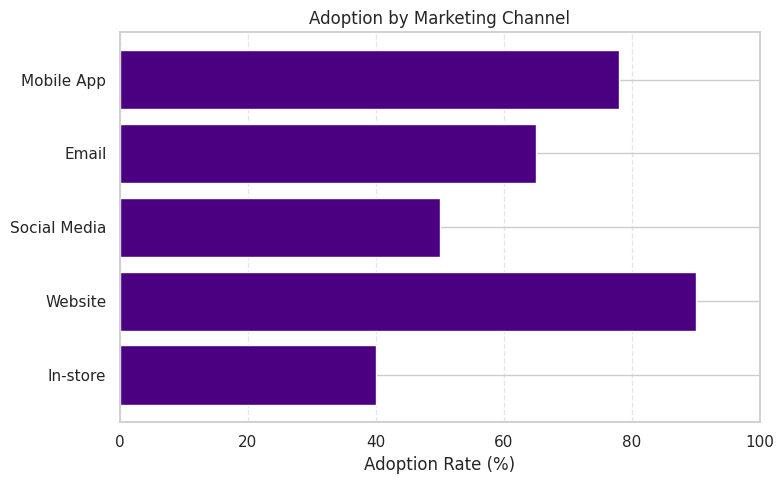

In [30]:
#mock data, % adoption by marketing channel
channels = [
    "Mobile App", 
    "Email", 
    "Social Media", 
    "Website", 
    "In-store"
]
adoption_rates = [78, 65, 50, 90, 40]

#reverse order for better horizontal bar chart alignment
channels = channels[::-1]
adoption_rates = adoption_rates[::-1]

#plot
plt.figure(figsize=(8, 5))
plt.barh(channels, adoption_rates, color='indigo')
plt.xlabel("Adoption Rate (%)")
plt.title("Adoption by Marketing Channel")
plt.xlim(0, 100)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
